---
---

# **`CGM - Assignment` : Predicting Height of the Children 👧👦📏** 

- Malnutrition is a global health crisis and is a leading cause of death among children under 5 years. 

- Detecting malnutrition requires `anthropometric measurements` of weight, height, and middle-upper arm circumference. 
    - Anthropometric measurements are a non invasive, inexpensive, and suitable method for `evaluating the nutritional status` in the samples.
    - However, anthropometric techniques are `prone to errors` that could arise, for example, from the inadequate training of personnel.


- Therefore, using a CNN-based deep learning model can certainly help in faster, easier and more precised collection of such measurements.


---
---

## **`Examples of various measurements` are shown below:**
![img_1](E:\STUDY\PROJECTS\Assignment_CGM\Doc_Images\Anthropometric_Measurements.png)


---
---


## **`NOTEBOOK Description` 📗**

- This notebook contains the below tasks:
    - `Exploratory Data Analysis`
        - To find some patterns in the provided data
        - Apply some normalizing techniques so that: 
            - performing edge detection will be easier, and
            - noise will be reduced
    - `Added 34 new features`
        - Given the overall bbox co-ordinates & body part specific co-ordinates:
            - calculated the TOP to BODY PART distance, and
            - calculated the BODY PART to BOTTOM distance

## **`NOTEBOOK Contents` ✍️**

[1. Libraries Import](#Import_Libraries)

[2. Dataset Import](#Dataset_Import)

##### ⭐ **`Adding some new Features`**

[1. How we can leverage the provided BBox co-ordinates❓](#Calculate_Distances)

##### ⭐ **`Extensive Data Analysis - I`**

[1. Let's visualize the Feature-1: NOSE Top dist](#Feature-1:NOSE_top_dist)

[2. Let's visualize the Feature-2: NOSE Bottom dist](#Feature-2:NOSE_bottom_dist)

[3. Let's visualize the Feature-3: LEFT EYE Top dist](#Feature-3:LEFT_EYE_top_dist)

[4. Let's visualize the Feature-4: RIGHT SHOULDER Top dist](#Feature-4:RIGHT_SHOULDER_top_dist)

[5. Let's visualize the Feature-5: RIGHT ELBOW Top dist](#Feature-5:RIGHT_ELBOW_top_dist)

[6. Let's visualize the Feature-6: LEFT WRIST Top dist](#Feature-6:LEFT_WRIST_top_dist)

[7. Let's visualize the Feature-7: RIGHT HIP Top dist](#Feature-7:RIGHT_HIP_top_dist)

[8. Let's visualize the Feature-8: LEFT KNEE Bottom dist](#Feature-8:LEFT_KNEE_bottom_dist)

[9. Let's visualize the Feature-9: RIGHT ANKLE Bottom dist](#Feature-9:RIGHT_ANKLE_bottom_dist)

##### ⭐ **`Extensive Data Analysis - II`**

[1. Lets plot some depth images here..](#Lets_plot_some_depth_images_here..)

[2. 🙋‍♂️ Why in some of the images the boundary pixels of the children are too dark or black❓ And, in others they are just like the inner region❓](#Query)

##### ⭐ **`Extensive Data Analysis - III`**

[1. 🧮 Image Smoothing](#⭐Image_Smoothing)

[2. 🧮 Image Gradients & Edges](#⭐Image_Gradients_&_Edges)

[3. 🧮 Sobel v/s Canny Edge Detection Techniques](#⭐Sobel_v/s_Canny_Edge_Detection_Techniques)


[⭐ SUMMARY](#SUMMARY)

## Import_Libraries

In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import ast

import plotly.express as px
import plotly.graph_objects as go
import hashlib
from IPython.display import display
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

In [2]:
# Setting the display option
pd.set_option('display.max_columns', 50)

# Defining the variables for better plotting 
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':17.5,'color':'Blue','style':'italic'}

## **Dataset_Import**

In [3]:
# Storing the location of the 'height_and_pose' file
height_pose_xlsx_loc = os.path.join(os.getcwd(), "height_and_pose.xlsx")
height_pose_xlsx_loc

'E:\\STUDY\\PROJECTS\\Assignment_CGM\\height_and_pose.xlsx'

In [4]:
# Creating the dataframe from XLSX file
hp_data = pd.read_excel(height_pose_xlsx_loc)
hp_data

Depthmap Image  Height(cm)  \
0  1d5fee00-ada4-11eb-a80b-3f50af21830f        76.7   
1  1eddf4c0-ad9f-11eb-a80b-ef4adba049aa        66.4   
2  38e29bc0-8fc0-11eb-b5f2-0742da91b282        63.2   
3  6cd5d480-8b8b-11eb-b152-f7b115384fa9        87.1   
4  76ed6fc0-8e1d-11eb-ad70-7be1a1219834        59.1   
5  8d23fa60-9201-11eb-b3e6-cbfb48c6a300        86.4   
6  9dc3eba0-8d8d-11eb-8d3f-4776be867c61       100.6   
7  9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4       106.1   
8  d3757800-8dff-11eb-a328-472d4f8db277        99.9   

                                                Pose  
0  [{'bbox_coordinates': [(158.91087, 92.53168), ...  
1  [{'bbox_coordinates': [(131.00702, 68.115364),...  
2  [{'bbox_coordinates': [(116.070114, 37.567608)...  
3  [{'bbox_coordinates': [(145.24242, 26.49348), ...  
4  [{'bbox_coordinates': [(150.17046, 65.00379), ...  
5  [{'bbox_coordinates': [(146.97789, 37.342777),...  
6  [{'bbox_coordinates': [(135.09724, 42.205784),...  
7  [{'bbox_coordinates': [(167.52087, 52.946323),...  
8  [{'bbox_coordinates': [(92.025406, 19.148962),...

## ⭐ **`Adding some new Features`**
#### **Calculating the TOP & BOTTOM Distances b/w every body part coordinates with the overall bounding box coordinates.**

In [5]:
# Storing every row in the dataframe as a list
list_of_a_row = hp_data['Pose'].map(ast.literal_eval)

In [6]:
# Example of the first row the way it gets stored
list_of_a_row[0]

[{'bbox_coordinates': [(158.91087, 92.53168), (396.85934, 616.8171)],
  'bbox_confidence_score': [0.99280316],
  'key_points_coordinate': [{'nose': {'x': 265.9385, 'y': 182.3019}},
   {'left_eye': {'x': 289.8317, 'y': 168.64862}},
   {'right_eye': {'x': 245.45859, 'y': 165.2353}},
   {'left_ear': {'x': 317.13824, 'y': 178.88858}},
   {'right_ear': {'x': 221.56538, 'y': 172.06195}},
   {'left_shoulder': {'x': 334.20483, 'y': 233.50165}},
   {'right_shoulder': {'x': 221.56538, 'y': 243.7416}},
   {'left_elbow': {'x': 378.57794, 'y': 284.7014}},
   {'right_elbow': {'x': 194.25885, 'y': 308.5946}},
   {'left_wrist': {'x': 358.09805, 'y': 342.72778}},
   {'right_wrist': {'x': 235.21864, 'y': 315.42123}},
   {'left_hip': {'x': 341.03146, 'y': 393.92752}},
   {'right_hip': {'x': 269.3518, 'y': 404.16748}},
   {'left_knee': {'x': 354.68472, 'y': 506.56696}},
   {'right_knee': {'x': 231.80533, 'y': 486.08707}},
   {'left_ankle': {'x': 313.7249, 'y': 489.50037}},
   {'right_ankle': {'x': 214.738

In [7]:
# Storing the list of every list of row created above
dict_of_a_row = list_of_a_row[list_of_a_row.str.len() > 0].explode()

In [8]:
# Example of the first row dict the way it gets stored
dict_of_a_row.iloc[0]

{'bbox_coordinates': [(158.91087, 92.53168), (396.85934, 616.8171)],
 'bbox_confidence_score': [0.99280316],
 'key_points_coordinate': [{'nose': {'x': 265.9385, 'y': 182.3019}},
  {'left_eye': {'x': 289.8317, 'y': 168.64862}},
  {'right_eye': {'x': 245.45859, 'y': 165.2353}},
  {'left_ear': {'x': 317.13824, 'y': 178.88858}},
  {'right_ear': {'x': 221.56538, 'y': 172.06195}},
  {'left_shoulder': {'x': 334.20483, 'y': 233.50165}},
  {'right_shoulder': {'x': 221.56538, 'y': 243.7416}},
  {'left_elbow': {'x': 378.57794, 'y': 284.7014}},
  {'right_elbow': {'x': 194.25885, 'y': 308.5946}},
  {'left_wrist': {'x': 358.09805, 'y': 342.72778}},
  {'right_wrist': {'x': 235.21864, 'y': 315.42123}},
  {'left_hip': {'x': 341.03146, 'y': 393.92752}},
  {'right_hip': {'x': 269.3518, 'y': 404.16748}},
  {'left_knee': {'x': 354.68472, 'y': 506.56696}},
  {'right_knee': {'x': 231.80533, 'y': 486.08707}},
  {'left_ankle': {'x': 313.7249, 'y': 489.50037}},
  {'right_ankle': {'x': 214.73874, 'y': 547.52673}

In [9]:
# Updated dataframe with the child entities
child_entities_df = pd.DataFrame(list(dict_of_a_row), index=dict_of_a_row.index)
child_entities_df

bbox_coordinates bbox_confidence_score  \
0    [(158.91087, 92.53168), (396.85934, 616.8171)]          [0.99280316]   
1    [(131.00702, 68.115364), (420.1891, 559.3997)]           [0.9962908]   
2   [(116.070114, 37.567608), (395.045, 542.00757)]          [0.98634934]   
3     [(145.24242, 26.49348), (346.4439, 637.2346)]            [0.999383]   
4    [(150.17046, 65.00379), (373.36887, 611.4233)]           [0.9969072]   
5  [(146.97789, 37.342777), (323.04355, 616.20996)]           [0.9988991]   
6   [(135.09724, 42.205784), (308.40625, 609.4822)]          [0.99963164]   
7   [(167.52087, 52.946323), (322.8788, 583.97754)]            [0.999605]   
8   [(92.025406, 19.148962), (295.21625, 625.0551)]          [0.99962795]   

                               key_points_coordinate  \
0  [{'nose': {'x': 265.9385, 'y': 182.3019}}, {'l...   
1  [{'nose': {'x': 305.9835, 'y': 200.21199}}, {'...   
2  [{'nose': {'x': 191.51735, 'y': 123.93983}}, {...   
3  [{'nose': {'x': 239.8789, 'y': 142.99553}}, {'...   
4  [{'nose': {'x': 167.49805, 'y': 155.00647}}, {...   
5  [{'nose': {'x': 304.73105, 'y': 143.99603}}, {...   
6  [{'nose': {'x': 212.51872, 'y': 161.49629}}, {...   
7  [{'nose': {'x': 222.72783, 'y': 157.70052}}, {...   
8  [{'nose': {'x': 235.04018, 'y': 126.83931}}, {...   

                                     key_points_prob  body_pose_score  
0  [{'nose': {'score': 0.9733702}}, {'left_eye': ...         0.932521  
1  [{'nose': {'score': 0.4369605}}, {'left_eye': ...         0.778794  
2  [{'nose': {'score': 0.64242655}}, {'left_eye':...         0.877052  
3  [{'nose': {'score': 0.96169055}}, {'left_eye':...         0.955477  
4  [{'nose': {'score': 0.58681124}}, {'left_eye':...         0.853830  
5  [{'nose': {'score': 0.9652283}}, {'left_eye': ...         0.908704  
6  [{'nose': {'score': 0.96656704}}, {'left_eye':...         0.960757  
7  [{'nose': {'score': 0.9798624}}, {'left_eye': ...         0.961107  
8  [{'nose': {'score': 0.7892967}}, {'left_eye': ...         0.915556

In [10]:
# I'm dropping the 'score' and 'probabilities' columns
child_entities_df.drop(['bbox_confidence_score', 'key_points_prob', 'body_pose_score'], axis=1, inplace=True)

**`REASONING`**
- The reason for dropping these features as it seems to be the output from the instance segmentation/detection model.
- And, using them for training the further will not be very useful.

In [11]:
# Creating a list of all the sub-entities within a keypoint co-orrdinates
## For example, X & Y co-orrdinates of nose, left_eye and others
each_body_component = [{k:v for entity in category for k, v in entity.items()} for category in child_entities_df['key_points_coordinate']]

In [12]:
# Dictionary containing the X & Y co-orrdinates of every body part
each_body_component[0]

{'nose': {'x': 265.9385, 'y': 182.3019},
 'left_eye': {'x': 289.8317, 'y': 168.64862},
 'right_eye': {'x': 245.45859, 'y': 165.2353},
 'left_ear': {'x': 317.13824, 'y': 178.88858},
 'right_ear': {'x': 221.56538, 'y': 172.06195},
 'left_shoulder': {'x': 334.20483, 'y': 233.50165},
 'right_shoulder': {'x': 221.56538, 'y': 243.7416},
 'left_elbow': {'x': 378.57794, 'y': 284.7014},
 'right_elbow': {'x': 194.25885, 'y': 308.5946},
 'left_wrist': {'x': 358.09805, 'y': 342.72778},
 'right_wrist': {'x': 235.21864, 'y': 315.42123},
 'left_hip': {'x': 341.03146, 'y': 393.92752},
 'right_hip': {'x': 269.3518, 'y': 404.16748},
 'left_knee': {'x': 354.68472, 'y': 506.56696},
 'right_knee': {'x': 231.80533, 'y': 486.08707},
 'left_ankle': {'x': 313.7249, 'y': 489.50037},
 'right_ankle': {'x': 214.73874, 'y': 547.52673}}

In [13]:
# Joining the X & Y co-orrdinates of every body part with the overall bounding box 
child_entities_df = child_entities_df.join(pd.DataFrame(each_body_component, index=child_entities_df.index))
child_entities_df.drop(labels=['key_points_coordinate'], axis=1, inplace=True)
child_entities_df.head()

bbox_coordinates  \
0   [(158.91087, 92.53168), (396.85934, 616.8171)]   
1   [(131.00702, 68.115364), (420.1891, 559.3997)]   
2  [(116.070114, 37.567608), (395.045, 542.00757)]   
3    [(145.24242, 26.49348), (346.4439, 637.2346)]   
4   [(150.17046, 65.00379), (373.36887, 611.4233)]   

                               nose                           left_eye  \
0    {'x': 265.9385, 'y': 182.3019}    {'x': 289.8317, 'y': 168.64862}   
1   {'x': 305.9835, 'y': 200.21199}     {'x': 197.23564, 'y': 152.235}   
2  {'x': 191.51735, 'y': 123.93983}   {'x': 201.36969, 'y': 123.93983}   
3   {'x': 239.8789, 'y': 142.99553}  {'x': 263.73596, 'y': 127.090805}   
4  {'x': 167.49805, 'y': 155.00647}   {'x': 171.05548, 'y': 151.44904}   

                           right_eye                          left_ear  \
0    {'x': 245.45859, 'y': 165.2353}  {'x': 317.13824, 'y': 178.88858}   
1     {'x': 305.9835, 'y': 181.0212}  {'x': 216.42644, 'y': 177.82274}   
2    {'x': 299.89313, 'y': 137.0763}  {'x': 198.08557, 'y': 150.21274}   
3  {'x': 223.97418, 'y': 127.090805}   {'x': 295.5454, 'y': 135.04317}   
4   {'x': 174.61288, 'y': 151.44904}   {'x': 213.7445, 'y': 169.23615}   

                          right_ear                     left_shoulder  \
0  {'x': 221.56538, 'y': 172.06195}  {'x': 334.20483, 'y': 233.50165}   
1   {'x': 286.7927, 'y': 197.01353}   {'x': 210.0295, 'y': 219.40279}   
2   {'x': 299.89313, 'y': 140.3604}  {'x': 201.36969, 'y': 196.19034}   
3  {'x': 208.06947, 'y': 135.04317}  {'x': 311.45013, 'y': 202.63821}   
4  {'x': 295.56512, 'y': 147.89163}   {'x': 195.9574, 'y': 219.04001}   

                     right_shoulder                         left_elbow  \
0   {'x': 221.56538, 'y': 243.7416}    {'x': 378.57794, 'y': 284.7014}   
1   {'x': 305.9835, 'y': 228.99818}   {'x': 184.44177, 'y': 187.41814}   
2    {'x': 296.609, 'y': 202.75858}  {'x': 191.51735, 'y': 127.223946}   
3  {'x': 204.09329, 'y': 194.68585}    {'x': 323.37866, 'y': 278.1856}   
4   {'x': 309.7948, 'y': 176.35098}   {'x': 160.38321, 'y': 194.13806}   

                        right_elbow                        left_wrist  \
0   {'x': 194.25885, 'y': 308.5946}  {'x': 358.09805, 'y': 342.72778}   
1  {'x': 373.15128, 'y': 222.60126}  {'x': 203.63257, 'y': 129.84575}   
2   {'x': 342.5866, 'y': 153.49686}  {'x': 204.65381, 'y': 97.666916}   
3  {'x': 172.28386, 'y': 270.23328}   {'x': 323.37866, 'y': 341.8045}   
4   {'x': 348.92642, 'y': 140.7768}  {'x': 167.49805, 'y': 147.89163}   

                        right_wrist                          left_hip  \
0  {'x': 235.21864, 'y': 315.42123}  {'x': 341.03146, 'y': 393.92752}   
1  {'x': 398.73898, 'y': 184.21967}  {'x': 242.01416, 'y': 353.73837}   
2  {'x': 362.2913, 'y': 100.951035}   {'x': 234.21083, 'y': 350.5437}   
3   {'x': 160.35532, 'y': 337.8283}  {'x': 271.68832, 'y': 373.61392}   
4    {'x': 331.1393, 'y': 98.08776}  {'x': 235.08902, 'y': 361.33676}   

                          right_hip                         left_knee  \
0   {'x': 269.3518, 'y': 404.16748}  {'x': 354.68472, 'y': 506.56696}   
1    {'x': 305.9835, 'y': 350.5399}  {'x': 235.61723, 'y': 427.30307}   
2   {'x': 293.3249, 'y': 357.11194}  {'x': 224.35849, 'y': 432.64658}   
3  {'x': 208.06947, 'y': 369.63776}    {'x': 259.7598, 'y': 476.9946}   
4    {'x': 309.7948, 'y': 350.6645}  {'x': 203.07224, 'y': 443.15738}   

                         right_knee                       left_ankle  \
0  {'x': 231.80533, 'y': 486.08707}  {'x': 313.7249, 'y': 489.50037}   
1  {'x': 344.36508, 'y': 398.51688}  {'x': 267.6019, 'y': 494.47086}   
2   {'x': 319.5978, 'y': 416.22598}  {'x': 250.6314, 'y': 508.18118}   
3  {'x': 196.14093, 'y': 469.04224}  {'x': 243.85509, 'y': 560.4944}   
4  {'x': 324.02448, 'y': 450.27222}  {'x': 224.41675, 'y': 539.2077}   

                        right_ankle  
0  {'x': 214.73874, 'y': 547.52673}  
1    {'x': 360.3574, 'y': 472.0816}  
2   {'x': 306.46133, 'y': 488.4765}  
3   {'x': 188.18857, 'y': 556.518

In [14]:
# Getting the body parts names in a list
body_parts_cols = list(child_entities_df.columns)[1:]
body_parts_cols

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [15]:
# Storing only the co-orrdinates values in the dataframe
for body_part_col in body_parts_cols:
    child_entities_df[body_part_col] = child_entities_df[body_part_col].apply(lambda val_dict : tuple([v for v in val_dict.values()]))

In [16]:
# Dataframe with the co-orrdinates values of the overall bounding box & body parts
child_entities_df

bbox_coordinates                    nose  \
0    [(158.91087, 92.53168), (396.85934, 616.8171)]    (265.9385, 182.3019)   
1    [(131.00702, 68.115364), (420.1891, 559.3997)]   (305.9835, 200.21199)   
2   [(116.070114, 37.567608), (395.045, 542.00757)]  (191.51735, 123.93983)   
3     [(145.24242, 26.49348), (346.4439, 637.2346)]   (239.8789, 142.99553)   
4    [(150.17046, 65.00379), (373.36887, 611.4233)]  (167.49805, 155.00647)   
5  [(146.97789, 37.342777), (323.04355, 616.20996)]  (304.73105, 143.99603)   
6   [(135.09724, 42.205784), (308.40625, 609.4822)]  (212.51872, 161.49629)   
7   [(167.52087, 52.946323), (322.8788, 583.97754)]  (222.72783, 157.70052)   
8   [(92.025406, 19.148962), (295.21625, 625.0551)]  (235.04018, 126.83931)   

                  left_eye                right_eye                left_ear  \
0    (289.8317, 168.64862)    (245.45859, 165.2353)  (317.13824, 178.88858)   
1     (197.23564, 152.235)     (305.9835, 181.0212)  (216.42644, 177.82274)   
2   (201.36969, 123.93983)    (299.89313, 137.0763)  (198.08557, 150.21274)   
3  (263.73596, 127.090805)  (223.97418, 127.090805)   (295.5454, 135.04317)   
4   (171.05548, 151.44904)   (174.61288, 151.44904)   (213.7445, 169.23615)   
5   (300.96237, 128.92137)   (293.42505, 128.92137)  (233.12637, 136.45871)   
6   (227.29155, 143.03027)   (194.05269, 143.03027)   (256.8372, 139.33707)   
7    (240.01399, 136.9571)   (208.89888, 140.41435)  (267.67188, 143.87158)   
8  (235.04018, 118.949905)    (242.92958, 111.0605)   (148.25676, 115.0052)   

                right_ear            left_shoulder          right_shoulder  \
0  (221.56538, 172.06195)   (334.20483, 233.50165)   (221.56538, 243.7416)   
1   (286.7927, 197.01353)    (210.0295, 219.40279)   (305.9835, 228.99818)   
2   (299.89313, 140.3604)   (201.36969, 196.19034)    (296.609, 202.75858)   
3  (208.06947, 135.04317)   (311.45013, 202.63821)  (204.09329, 194.68585)   
4  (295.56512, 147.89163)    (195.9574, 219.04001)   (309.7948, 176.35098)   
5  (236.89505, 140.22737)   (191.67105, 200.52603)   (263.2757, 211.83203)   
6  (171.89346, 139.33707)    (271.61002, 216.8944)   (160.81384, 220.5876)   
7  (195.06995, 150.78606)    (291.8725, 209.55904)  (191.61272, 209.55904)   
8   (235.04018, 111.0605)  (120.643845, 189.95453)  (254.76369, 193.89923)   

                left_elbow             right_elbow              left_wrist  \
0    (378.57794, 284.7014)   (194.25885, 308.5946)  (358.09805, 342.72778)   
1   (184.44177, 187.41814)  (373.15128, 222.60126)  (203.63257, 129.84575)   
2  (191.51735, 127.223946)   (342.5866, 153.49686)  (204.65381, 97.666916)   
3    (323.37866, 278.1856)  (172.28386, 270.23328)   (323.37866, 341.8045)   
4   (160.38321, 194.13806)   (348.92642, 140.7768)  (167.49805, 147.89163)   
5   (165.29037, 275.89935)  (289.65637, 313.58603)  (221.82037, 298.51135)   
6   (286.38284, 301.83813)  (149.73422, 305.53134)  (290.07605, 372.00903)   
7     (302.2442, 299.4471)   (184.69824, 299.4471)   (305.70145, 368.5918)   
8   (108.80974, 296.46146)  (270.54248, 300.40616)   (112.75444, 367.4661)   

              right_wrist                left_hip               right_hip  \
0  (235.21864, 315.42123)  (341.03146, 393.92752)   (269.3518, 404.16748)   
1  (398.73898, 184.21967)  (242.01416, 353.73837)    (305.9835, 350.5399)   
2  (362.2913, 100.951035)   (234.21083, 350.5437)   (293.3249, 357.11194)   
3   (160.35532, 337.8283)  (271.68832, 373.61392)  (208.06947, 369.63776)   
4    (331.1393, 98.08776)  (235.08902, 361.33676)    (309.7948, 350.6645)   
5  (304.73105, 279.66803)   (199.20837, 362.5787)   (255.73837, 373.8847)   
6  (149.73422, 379.39545)     (253.144, 349.8498)   (190.35948, 349.8498)   
7  (184.69824, 382.42075)   (271.1291, 361.67734)  (215.81335, 361.67734)   
8    (282.3766, 371.4108)   (160.09085, 367.4661)   (231.09547, 371.4108)   

                left_knee              right_knee              left_ankle  \
0  (354.68472, 506.56696)  (231.80533, 486.

### **`Calculate_Distances`**
##### **Generating the distances based on the coordinates**

In [17]:
def calc_distances(bb_coords, bp_coords):
    """
    Description : This function is created for calculating the 2 Euclidean Distances:
        - 1 : From the top of the bounding box to the body part
        - 2 : From the bottom of the bounding box to the body part
        
    Input Parameters : It accepts 2 inputs:
        - bb_coords : `list`
            Containing the X & Y coordinates of the bounding box top & bottom
        
        - bp_cords : `list`
            Containing the X & Y coordinates of the specific body part
            
    Returns : It returns 1 list object.
        - distances : `list`
            Containing the 2 distances in a single container.
    """
    # Storing the top coordinate as an array
    top_array = np.array(bb_coords)[0]
    
    # Storing the bottom coordinate as an array
    bottom_array = np.array(bb_coords)[1]
    
    # Storing the body-part coordinate as an array
    body_part_array = np.array(bp_coords)
    
    # Euclidean distance fron the top to body part
    diff_from_top = np.sqrt(np.sum(np.square(top_array - body_part_array)))
    
    # Euclidean distance fron the bottom to body part
    diff_from_bottom = np.sqrt(np.sum(np.square(bottom_array - body_part_array)))
    
    # Both the distances
    distances = [diff_from_top, diff_from_bottom]
    
    return distances

In [18]:
# Storing the top & based distances based on the co-orrdinates values in the dataframe
for body_part_col in body_parts_cols:
    col_name = body_part_col + "_dists"
    child_entities_df[col_name] = child_entities_df[['bbox_coordinates',body_part_col]].apply(lambda row: calc_distances(row['bbox_coordinates'], row[body_part_col]), axis=1)

In [19]:
# Shape of the Dataframe after adding the features
child_entities_df.shape

(9, 35)

In [20]:
# Displaying some records
child_entities_df.head()

bbox_coordinates                    nose  \
0   [(158.91087, 92.53168), (396.85934, 616.8171)]    (265.9385, 182.3019)   
1   [(131.00702, 68.115364), (420.1891, 559.3997)]   (305.9835, 200.21199)   
2  [(116.070114, 37.567608), (395.045, 542.00757)]  (191.51735, 123.93983)   
3    [(145.24242, 26.49348), (346.4439, 637.2346)]   (239.8789, 142.99553)   
4   [(150.17046, 65.00379), (373.36887, 611.4233)]  (167.49805, 155.00647)   

                  left_eye                right_eye                left_ear  \
0    (289.8317, 168.64862)    (245.45859, 165.2353)  (317.13824, 178.88858)   
1     (197.23564, 152.235)     (305.9835, 181.0212)  (216.42644, 177.82274)   
2   (201.36969, 123.93983)    (299.89313, 137.0763)  (198.08557, 150.21274)   
3  (263.73596, 127.090805)  (223.97418, 127.090805)   (295.5454, 135.04317)   
4   (171.05548, 151.44904)   (174.61288, 151.44904)   (213.7445, 169.23615)   

                right_ear           left_shoulder          right_shoulder  \
0  (221.56538, 172.06195)  (334.20483, 233.50165)   (221.56538, 243.7416)   
1   (286.7927, 197.01353)   (210.0295, 219.40279)   (305.9835, 228.99818)   
2   (299.89313, 140.3604)  (201.36969, 196.19034)    (296.609, 202.75858)   
3  (208.06947, 135.04317)  (311.45013, 202.63821)  (204.09329, 194.68585)   
4  (295.56512, 147.89163)   (195.9574, 219.04001)   (309.7948, 176.35098)   

                left_elbow             right_elbow              left_wrist  \
0    (378.57794, 284.7014)   (194.25885, 308.5946)  (358.09805, 342.72778)   
1   (184.44177, 187.41814)  (373.15128, 222.60126)  (203.63257, 129.84575)   
2  (191.51735, 127.223946)   (342.5866, 153.49686)  (204.65381, 97.666916)   
3    (323.37866, 278.1856)  (172.28386, 270.23328)   (323.37866, 341.8045)   
4   (160.38321, 194.13806)   (348.92642, 140.7768)  (167.49805, 147.89163)   

              right_wrist                left_hip               right_hip  \
0  (235.21864, 315.42123)  (341.03146, 393.92752)   (269.3518, 404.16748)   
1  (398.73898, 184.21967)  (242.01416, 353.73837)    (305.9835, 350.5399)   
2  (362.2913, 100.951035)   (234.21083, 350.5437)   (293.3249, 357.11194)   
3   (160.35532, 337.8283)  (271.68832, 373.61392)  (208.06947, 369.63776)   
4    (331.1393, 98.08776)  (235.08902, 361.33676)    (309.7948, 350.6645)   

                left_knee              right_knee             left_ankle  \
0  (354.68472, 506.56696)  (231.80533, 486.08707)  (313.7249, 489.50037)   
1  (235.61723, 427.30307)  (344.36508, 398.51688)  (267.6019, 494.47086)   
2  (224.35849, 432.64658)   (319.5978, 416.22598)  (250.6314, 508.18118)   
3    (259.7598, 476.9946)  (196.14093, 469.04224)  (243.85509, 560.4944)   
4  (203.07224, 443.15738)  (324.02448, 450.27222)  (224.41675, 539.2077)   

              right_ankle                                nose_dists  \
0  (214.73874, 547.52673)  [139.69110917401042, 453.81023057809705]   
1    (360.3574, 472.0816)  [219.24024984882283, 376.90679230600784]   
2   (306.46133, 488.4765)  [114.68411465088343, 464.97756886029464]   
3   (188.18857, 556.5182)  [150.09593932213122, 505.59703078584715]   
4    (309.7948, 546.3225)   [91.65548419156653, 500.69862915202924]   

                             left_eye_dists  \
0   [151.4399296184877, 460.77098670541307]   
1    [107.06233356263488, 464.210446082444]   
2  [121.39266204757624, 460.75021533614466]   
3   [155.43661350816677, 516.8048905690092]   
4   [88.93236367016735, 502.50077376640905]   

                            right_eye_dists  \
0  [113.03240331118683, 476.28595317498343]   
1   [208.2414376536267, 395.23816659529484]   
2   [209.02842150025225, 415.9605892248805]   
3   [127.74393069673886, 524.6384697045008]   
4   [89.83436504489192, 501.07909896884325]   

                             left_ear_dists  \
0  [180.25929877464546, 445.12564789573787]   
1  [139.04023037215444, 432.57392202156296]   
2  [139.33937270630062, 438.51591291611504]   
3   [185.40232198108117, 504.7641921409391]   
4   [122.0

In [21]:
# Columns containing both the distances
body_parts_cols_dists = [bp + "_dists" for bp in body_parts_cols]
body_parts_cols_dists

['nose_dists',
 'left_eye_dists',
 'right_eye_dists',
 'left_ear_dists',
 'right_ear_dists',
 'left_shoulder_dists',
 'right_shoulder_dists',
 'left_elbow_dists',
 'right_elbow_dists',
 'left_wrist_dists',
 'right_wrist_dists',
 'left_hip_dists',
 'right_hip_dists',
 'left_knee_dists',
 'right_knee_dists',
 'left_ankle_dists',
 'right_ankle_dists']

In [22]:
# Number of columns having distances of body parts
len(body_parts_cols_dists)

17

In [23]:
# Shape of the DataFrame having distances for all the body parts
child_entities_df[body_parts_cols_dists].shape

(9, 17)

In [24]:
# DataFrame having distances for all the body parts
body_parts_distances_df = child_entities_df[body_parts_cols_dists].copy(deep=True)
body_parts_distances_df.head()

nose_dists  \
0  [139.69110917401042, 453.81023057809705]   
1  [219.24024984882283, 376.90679230600784]   
2  [114.68411465088343, 464.97756886029464]   
3  [150.09593932213122, 505.59703078584715]   
4   [91.65548419156653, 500.69862915202924]   

                             left_eye_dists  \
0   [151.4399296184877, 460.77098670541307]   
1    [107.06233356263488, 464.210446082444]   
2  [121.39266204757624, 460.75021533614466]   
3   [155.43661350816677, 516.8048905690092]   
4   [88.93236367016735, 502.50077376640905]   

                            right_eye_dists  \
0  [113.03240331118683, 476.28595317498343]   
1   [208.2414376536267, 395.23816659529484]   
2   [209.02842150025225, 415.9605892248805]   
3   [127.74393069673886, 524.6384697045008]   
4   [89.83436504489192, 501.07909896884325]   

                             left_ear_dists  \
0  [180.25929877464546, 445.12564789573787]   
1  [139.04023037215444, 432.57392202156296]   
2  [139.33937270630062, 438.51591291611504]   
3   [185.40232198108117, 504.7641921409391]   
4   [122.09030851419453, 470.1163846570543]   

                            right_ear_dists  \
0  [101.24550098455241, 478.05346548686794]   
1   [202.19771336794577, 386.1584334702907]   
2    [210.611631441598, 412.76425176304423]   
3   [125.42038674313916, 520.9066281429617]   
4  [167.36188686908736, 470.01599186309767]   

                        left_shoulder_dists  \
0  [224.94555975676096, 388.40226805728435]   
1   [170.68227093361477, 399.7060873713436]   
2   [180.10327252141641, 396.3580228385304]   
3   [242.1816854558102, 436.00296574661627]   
4   [160.69723378593673, 430.6268407319556]   

                      right_shoulder_dists  \
0  [163.67659432474304, 412.2054113093757]   
1  [237.69738963076614, 349.5827276763977]   
2    [244.7086974106678, 353.241451859801]   
3  [178.19118447884506, 464.8796535598591]   
4   [194.6230372831842, 439.6926039934574]   

                           left_elbow_dists  \
0  [291.86096506258474, 332.61847178479127]   
1  [130.72270219387553, 440.39423768047027]   
2   [117.17740551663508, 462.0270111726108]   
3     [308.3527902767089, 359.789090575656]   
4  [129.53748473316674, 468.49745238100627]   

                         right_elbow_dists  \
0  [218.93529886477148, 368.8469439408304]   
1   [287.2276705226542, 340.0672664294316]   
2  [254.45885698687655, 392.0362936199455]   
3   [245.2352535450676, 406.2286159474047]   
4  [212.70985092369773, 471.2807669789343]   

                           left_wrist_dists  \
0  [319.80247205355124, 276.81653299708546]   
1   [95.31584898909254, 481.05439052797703]   
2  [107.04670952018692, 483.41226921413966]   
3    [362.1512934324245, 296.3291232435104]   
4   [84.67962798143188, 507.19266913123005]   

                          right_wrist_dists  \
0   [235.58995577395783, 342.0046583740445]   
1  [291.82291252947095, 375.79271222153227]   
2   [254.24856194974026, 442.2710389906807]   
3   [311.70141143543515, 352.5238886743796]   
4   [183.96812256993468, 515.0696197694798]   

                            left_hip_dists  \
0   [352.1467899488134, 229.7749269565128]   
1   [306.4361053914105, 272.1082356368005]   
2  [334.53140800317254, 250.0520820848445]   
3  [369.43357385679445, 274.0150719664865]   
4   [308.2602649409984, 285.7701775994026]   

                            right_hip_dists  \
0  [330.62678485099315, 247.94764294704632]   
1  [332.23543924151994, 238.04481747645764]   
2  [365.41461283483454, 211.02931724551186]   
3   [348.84844145906817, 301.2566209327365]   
4    [327.23381725937145, 268.396747658769]   

                            left_knee_dists  \
0   [457.9875690763898, 118.04148398831656]   
1   [374.11108534469616, 226.9720133687275]   
2  [409.65078602792175, 202.71583763919438]   
3  [464.82845162846775, 182.18394768148482]   
4   [381.8360066272647, 239.40418129766098]   

                           right_knee_dists  \
0  [400.24923147551914, 210.55442754993538

In [25]:
# Storing the Top & Bottom Distances of each body part seperately
for col in body_parts_cols_dists:
    bp_name = "_".join(col.split("_")[0:-1])
    bp_name_top = bp_name + "_top_dist"
    bp_name_bottom = bp_name + "_bottom_dist"
    body_parts_distances_df = body_parts_distances_df.merge(body_parts_distances_df[col].apply(lambda row: pd.Series({bp_name_top:row[0],
                                                                                                                      bp_name_bottom:row[1]})),
                                                            left_index=True, right_index=True)

In [26]:
# Columns containing both the distances
body_parts_cols_top_dists = [bp + "_top_dist" for bp in body_parts_cols]
body_parts_cols_bottom_dists = [bp + "_bottom_dist" for bp in body_parts_cols]
both_dists_cols = []
for i in range(len(body_parts_cols_top_dists)):
    both_dists_cols.append(body_parts_cols_top_dists[i])
    both_dists_cols.append(body_parts_cols_bottom_dists[i])

len(both_dists_cols)

34

**`OBSERVATION`**
- So, we are good till here, as we have got the new 34 features that are representing the distances of a body part from the top & bottom of the overall bounding box.

In [27]:
# This dataframe is having the TOP & BOTTOM distances of every body part
body_parts_both_dists_df = body_parts_distances_df[both_dists_cols].copy(deep=True)
body_parts_both_dists_df = body_parts_both_dists_df.applymap(lambda val: np.round(val,3))
body_parts_both_dists_df

nose_top_dist  nose_bottom_dist  left_eye_top_dist  left_eye_bottom_dist  \
0        139.691           453.810            151.440               460.771   
1        219.240           376.907            107.062               464.210   
2        114.684           464.978            121.393               460.750   
3        150.096           505.597            155.437               516.805   
4         91.655           500.699             88.932               502.501   
5        190.423           472.569            179.159               487.789   
6        142.212           458.133            136.621               473.452   
7        118.411           437.884            110.964               454.636   
8        179.026           501.837            174.395               509.670   

   right_eye_top_dist  right_eye_bottom_dist  left_ear_top_dist  \
0             113.032                476.286            180.259   
1             208.241                395.238            139.040   
2             209.028                415.961            139.339   
3             127.744                524.638            185.402   
4              89.834                501.079            122.090   
5             172.724                488.188            131.322   
6             116.796                480.265            155.741   
7              96.762                457.973            135.269   
8             176.691                516.647            111.132   

   left_ear_bottom_dist  right_ear_top_dist  right_ear_bottom_dist  \
0               445.126             101.246                478.053   
1               432.574             202.198                386.158   
2               438.516             210.612                412.764   
3               504.764             125.420                520.907   
4               470.116             167.362                470.016   
5               488.105             136.639                483.716   
6               472.965             103.867                489.563   
7               443.555             101.644                451.652   
8               530.799             170.003                517.505   

   left_shoulder_top_dist  left_shoulder_bottom_dist  right_shoulder_top_dist  \
0                 224.946                    388.402                  163.677   
1                 170.682                    399.706                  237.697   
2                 180.103                    396.358                  244.709   
3                 242.182                    436.003                  178.191   
4                 160.697                    430.627                  194.623   
5                 169.193                    435.949                  209.694   
6                 221.702                    394.308                  180.226   
7                 199.977                    375.700                  158.455   
8                 173.186                    468.816                  238.792   

   right_shoulder_bottom_dist  left_elbow_top_dist  left_elbow_bottom_dist  \
0                     412.205              291.861                 332.618   
1                     349.583              130.723                 440.394   
2                     353.241              117.177                 462.027   
3                     464.880              308.353                 359.789   
4                     439.693              129.537                 468.497   
5                     408.771              239.258                 375.096   
6                     415.960              300.493                 308.431   
7                     396.762              280.915                 285.278   
8                     433.049              277.820                 377.785   

   right_elbow_top_dist  right_elbow_bottom_dist  left_wrist_top_dist  \
0               218.935                  368.847              319.802   
1               287.228                  340.067               95.316   
2               254.459      

In [28]:
# Dropping the Pose feature as we have got the distances
hp_data.drop(labels=['Pose'], axis=1, inplace=True)

In [29]:
# Creating the final dataframe having:
#### Image Name
#### Respective TOP & BOTTOM distances of every body part
#### TGT --> Height
hp_engg_df = pd.concat([hp_data['Depthmap Image'], body_parts_both_dists_df,hp_data['Height(cm)']], axis=1)
hp_engg_df.rename(columns={'Height(cm)':'Height', 'Depthmap Image': 'Img_name'}, inplace=True)

In [30]:
# Shape of the final dataframe
hp_engg_df.shape

(9, 36)

**`OBSERVATION`**
- So, we are good till here, as we have got the total of 35 + 1(TGT) features that are representing the entire dataset.

In [31]:
# Checking some of the records
hp_engg_df.head()

Img_name  nose_top_dist  nose_bottom_dist  \
0  1d5fee00-ada4-11eb-a80b-3f50af21830f        139.691           453.810   
1  1eddf4c0-ad9f-11eb-a80b-ef4adba049aa        219.240           376.907   
2  38e29bc0-8fc0-11eb-b5f2-0742da91b282        114.684           464.978   
3  6cd5d480-8b8b-11eb-b152-f7b115384fa9        150.096           505.597   
4  76ed6fc0-8e1d-11eb-ad70-7be1a1219834         91.655           500.699   

   left_eye_top_dist  left_eye_bottom_dist  right_eye_top_dist  \
0            151.440               460.771             113.032   
1            107.062               464.210             208.241   
2            121.393               460.750             209.028   
3            155.437               516.805             127.744   
4             88.932               502.501              89.834   

   right_eye_bottom_dist  left_ear_top_dist  left_ear_bottom_dist  \
0                476.286            180.259               445.126   
1                395.238            139.040               432.574   
2                415.961            139.339               438.516   
3                524.638            185.402               504.764   
4                501.079            122.090               470.116   

   right_ear_top_dist  right_ear_bottom_dist  left_shoulder_top_dist  \
0             101.246                478.053                 224.946   
1             202.198                386.158                 170.682   
2             210.612                412.764                 180.103   
3             125.420                520.907                 242.182   
4             167.362                470.016                 160.697   

   left_shoulder_bottom_dist  right_shoulder_top_dist  \
0                    388.402                  163.677   
1                    399.706                  237.697   
2                    396.358                  244.709   
3                    436.003                  178.191   
4                    430.627                  194.623   

   right_shoulder_bottom_dist  left_elbow_top_dist  left_elbow_bottom_dist  \
0                     412.205              291.861                 332.618   
1                     349.583              130.723                 440.394   
2                     353.241              117.177                 462.027   
3                     464.880              308.353                 359.789   
4                     439.693              129.537                 468.497   

   right_elbow_top_dist  right_elbow_bottom_dist  left_wrist_top_dist  \
0               218.935                  368.847              319.802   
1               287.228                  340.067               95.316   
2               254.459                  392.036              107.047   
3               245.235                  406.229              362.151   
4               212.710                  471.281               84.680   

   left_wrist_bottom_dist  right_wrist_top_dist  right_wrist_bottom_dist  \
0                 276.817               235.590                  342.005   
1                 481.054               291.823                  375.793   
2                 483.412               254.249                  442.271   
3                 296.329               311.701                  352.524   
4                 507.193               183.968                  515.070   

   left_hip_top_dist  left_hip_bottom_dist  right_hip_top_dist  \
0            352.147               229.775             330.627   
1            306.436               272.108             332.235   
2            334.531               250.052             365.415   
3            369.434               274.015             348.848   
4            308.260               285.770             327.234   

   right_hip_bottom_dist  left_knee_top_dist  left_knee_bottom_dist  \
0                247.948             457.988                118.041   
1                238.045             374.111                226.972   
2          

In [32]:
# Saving the dataframe
hp_engg_df.to_csv("HP_data_engg.csv")

## ⭐ **`Extensive Data Analysis - I`**
#### **Here, I'll visualize how some of the newly created features looks like. And, will try to find the pattern if exists.**

In [33]:
def hist_plot(df, col, bp_label, top_flag=True):
    """
    Description : This function is created for plotting the histogram of a specific feature.
    
    Input Parameters : It accepts 4 inputs:
        - df : `pandas dataframe`
            Dataframe containig the entire records.
        
        - col : `str`
            Feature name which you want to plot.
        
        - bp_label : `str`
            Variable that represents the respective body part.
        
        - top_flag : `str`
            Binary variable that represents whether it is the TOP or BOTTOM distance.
            
    Returns : None
        - It only plots the histogram.
    
    """
    # Label of Body part
    bp_lbl = str(bp_label).upper()
    
    # Flag for representing the TOP or BOTTOM distance
    if top_flag:
        tb_str = "TOP"
    else:
        tb_str = "BOTTOM"
        
    # Plotting the Histogram
    with plt.style.context('seaborn'):
        sns.displot(data=df, x=col, kind='hist', label=bp_lbl, height=7, aspect=1.2)
        # Providing the labels and title to the graph
        plt.xlabel(col, fontdict=label_font_dict)
        plt.xticks(rotation=15)
        plt.ylabel("Number or samples\n", fontdict=label_font_dict)
        plt.minorticks_on()
        plt.grid(which='major', linestyle="--", color='lightpink')
        plt.title("Samples --> {} to {} distances\n".format(bp_lbl, tb_str), fontdict=title_font_dict)
        plt.legend();

In [34]:
def kde_plot(df, col, bp_label, top_flag=True):
    """
    Description : This function is created for plotting the distribution of a specific feature.
    
    Input Parameters : It accepts 4 inputs:
        - df : `pandas dataframe`
            Dataframe containig the entire records.
        
        - col : `str`
            Feature name which you want to plot.
        
        - bp_label : `str`
            Variable that represents the respective body part.
        
        - top_flag : `str`
            Binary variable that represents whether it is the TOP or BOTTOM distance.
            
    Returns : None
        - It only plots the distribution.
    
    """
    # Label of Body part
    bp_lbl = str(bp_label).upper()
    
    # Flag for representing the TOP or BOTTOM distance
    if top_flag:
        tb_str = "TOP"
    else:
        tb_str = "BOTTOM"
        
    # Plotting the KDE
    with plt.style.context('seaborn'):
        sns.displot(data=df, x=col, kind='kde', label=bp_lbl, height=7, aspect=1.2)
        # Providing the labels and title to the graph
        plt.xlabel(col, fontdict=label_font_dict)
        plt.xticks(rotation=15)
        plt.minorticks_on()
        plt.grid(which='major', linestyle="--", color='lightpink')
        plt.title("Samples distribution of {} to {} distances\n".format(bp_lbl, tb_str), fontdict=title_font_dict)
        plt.legend();

In [35]:
def box_plot(df, col, bp_label, top_flag=True):
    """
    Description : This function is created for plotting the box-plot of a specific feature.
    
    Input Parameters : It accepts 4 inputs:
        - df : `pandas dataframe`
            Dataframe containig the entire records.
        
        - col : `str`
            Feature name which you want to plot.
        
        - bp_label : `str`
            Variable that represents the respective body part.
        
        - top_flag : `str`
            Binary variable that represents whether it is the TOP or BOTTOM distance.
            
    Returns : None
        - It only plots the box-plot.
    
    """
    # Label of Body part
    bp_lbl = str(bp_label).upper()
    
    # Flag for representing the TOP or BOTTOM distance
    if top_flag:
        tb_str = "TOP"
    else:
        tb_str = "BOTTOM"
        
    # Plotting the Box-plot
    with plt.style.context('seaborn'):
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x=col, palette='prism')
        # Providing the labels and title to the graph
        plt.xlabel(col, fontdict=label_font_dict)
        plt.xticks(rotation=15)
        plt.minorticks_on()
        plt.grid(which='major', linestyle="--", color='lightpink')
        plt.title("How the {} to {} distances look like?\n".format(bp_lbl, tb_str), fontdict=title_font_dict)

In [36]:
def strip_plot(df, col, bp_label, top_flag=True):
    """
    Description : This function is created for plotting the stripplot of a specific feature.
    
    Input Parameters : It accepts 4 inputs:
        - df : `pandas dataframe`
            Dataframe containig the entire records.
        
        - col : `str`
            Feature name which you want to plot.
        
        - bp_label : `str`
            Variable that represents the respective body part.
        
        - top_flag : `str`
            Binary variable that represents whether it is the TOP or BOTTOM distance.
            
    Returns : None
        - It only plots the Stripplot and tells how far the data points from the central value.
    
    """
    # Label of Body part
    bp_lbl = str(bp_label).upper()
    
    # Flag for representing the TOP or BOTTOM distance
    if top_flag:
        tb_str = "TOP"
    else:
        tb_str = "BOTTOM"
        
    # Plotting the Data points
    with plt.style.context('seaborn-poster'):
        plt.figure(figsize=(10,6))
        sns.stripplot(data=df, x=col, palette='plasma', size=8, label=bp_lbl)
        plt.axvline(df[col].mean(), linestyle="--", label='Mean')
        plt.axvline(df[col].median(), linestyle=":", label='Median')
        # Providing the labels and title to the graph
        plt.xlabel(col, fontdict=label_font_dict)
        plt.xticks(rotation=15)
        plt.minorticks_on()
        plt.grid(which='major', linestyle="--", color='lightpink')
        plt.title("Where the {} to {} distances stand?\n".format(bp_lbl, tb_str), fontdict=title_font_dict)
        plt.legend()

### **Feature-1:`NOSE_top_dist`**

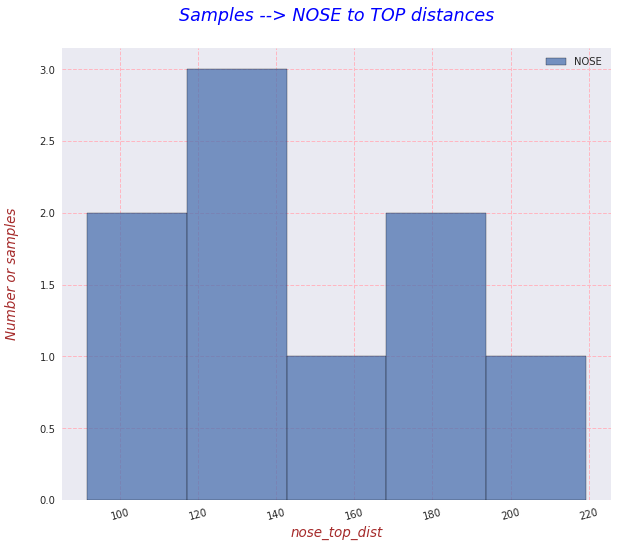

In [37]:
hist_plot(df=hp_engg_df, col='nose_top_dist', bp_label="nose", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to NOSE distance.

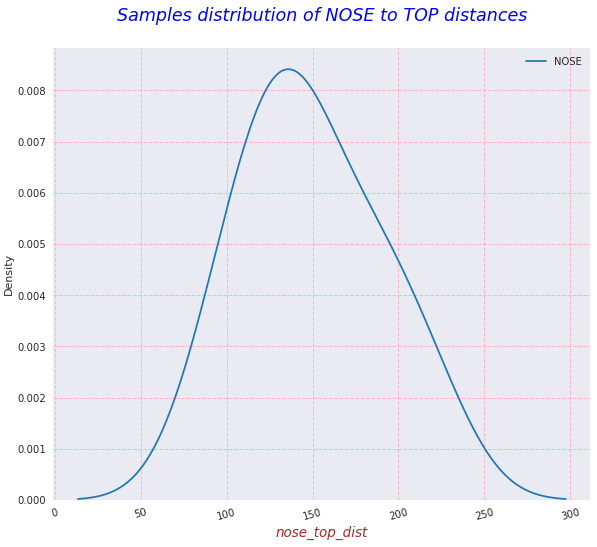

In [38]:
kde_plot(df=hp_engg_df, col='nose_top_dist', bp_label="nose", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the NOSE to TOP distances of the samples are seems to be normally distributed.

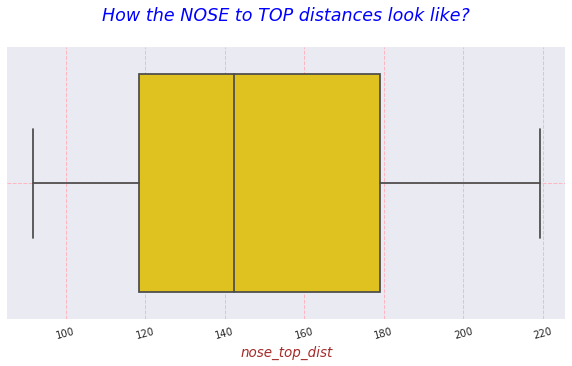

In [39]:
box_plot(df=hp_engg_df, col='nose_top_dist', bp_label="nose", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 120 to 180.

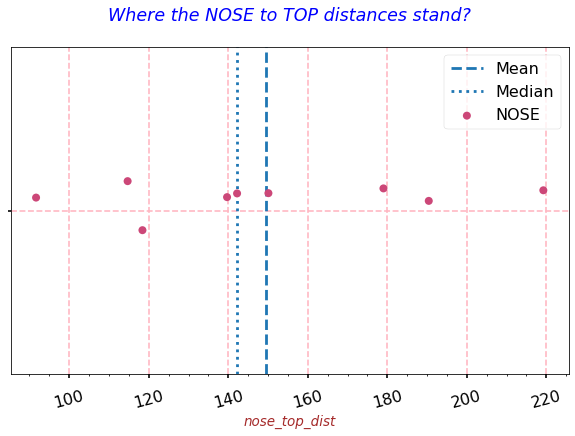

In [40]:
strip_plot(df=hp_engg_df, col='nose_top_dist', bp_label="nose", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples NOSE to TOP distances and how far they are from the central aspects(mean or median).

### **Feature-2:`NOSE_bottom_dist`**

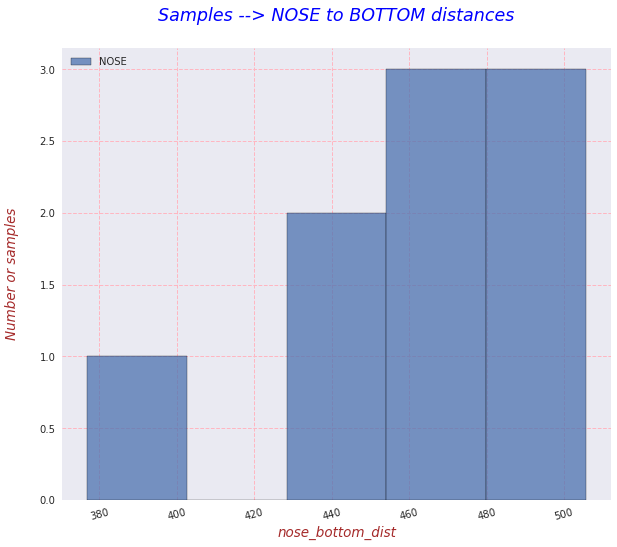

In [41]:
hist_plot(df=hp_engg_df, col='nose_bottom_dist', bp_label="nose", top_flag=False)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same BOTTOM to NOSE distance.

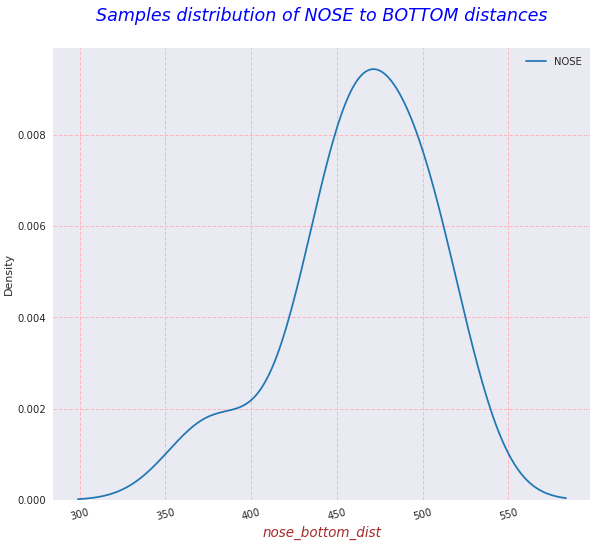

In [42]:
kde_plot(df=hp_engg_df, col='nose_bottom_dist', bp_label="nose", top_flag=False)

**`OBSERVATION`**
- Above plot telling us that the NOSE to BOTTOM distances of the samples are seems to be slightly left skewed.

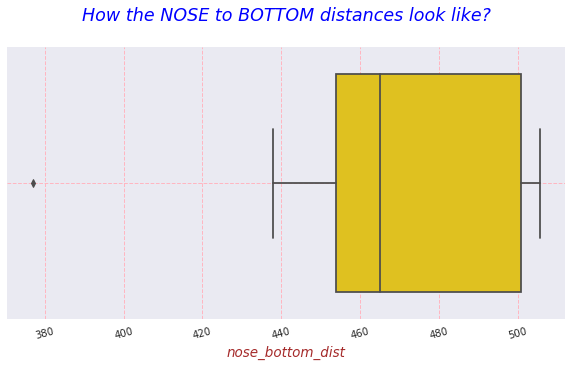

In [43]:
box_plot(df=hp_engg_df, col='nose_bottom_dist', bp_label="nose", top_flag=False)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 450 to 500.

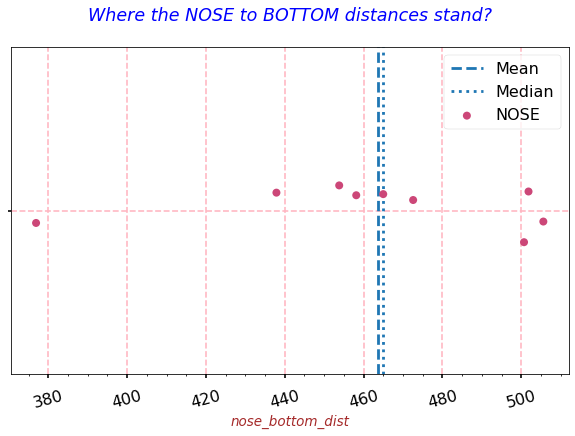

In [44]:
strip_plot(df=hp_engg_df, col='nose_bottom_dist', bp_label="nose", top_flag=False)

**`OBSERVATION`**
- Above plot showing us the samples NOSE to BOTTOM distances and how far they are from the central aspects(mean or median).

### **Feature-3:`LEFT_EYE_top_dist`**

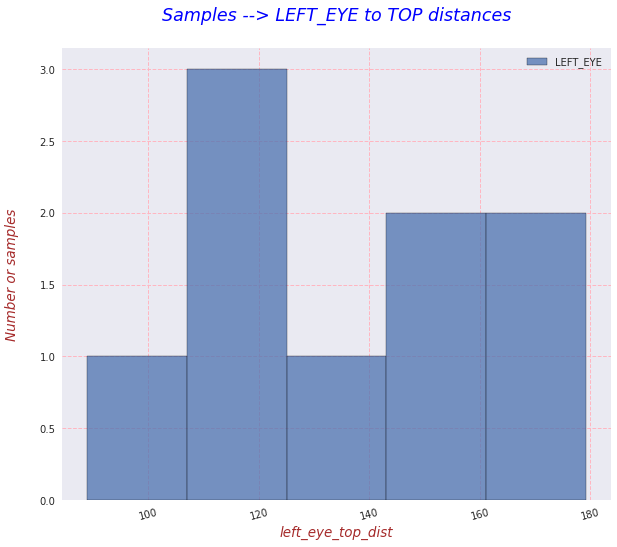

In [45]:
hist_plot(df=hp_engg_df, col='left_eye_top_dist', bp_label="left_eye", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to LEFT EYE distance.

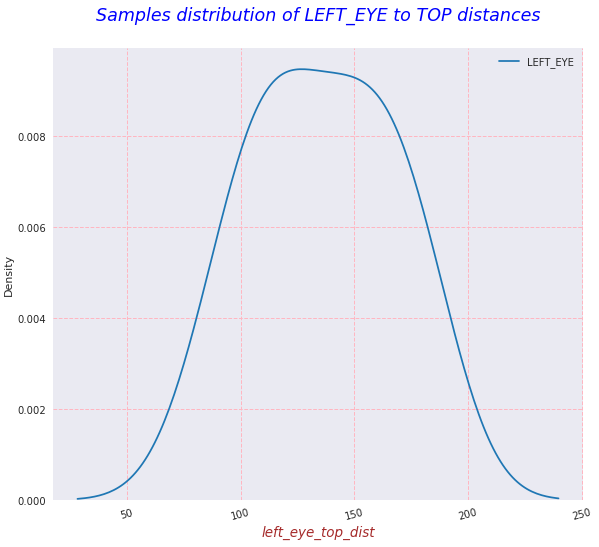

In [46]:
kde_plot(df=hp_engg_df, col='left_eye_top_dist', bp_label="left_eye", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the LEFT EYE to TOP distances of the samples are seems to have a flatter peak.

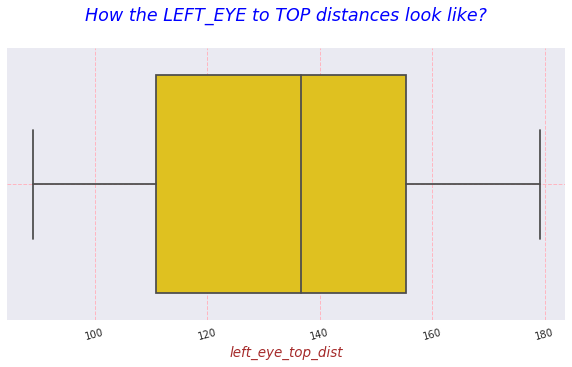

In [47]:
box_plot(df=hp_engg_df, col='left_eye_top_dist', bp_label="left_eye", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 110 to 160.

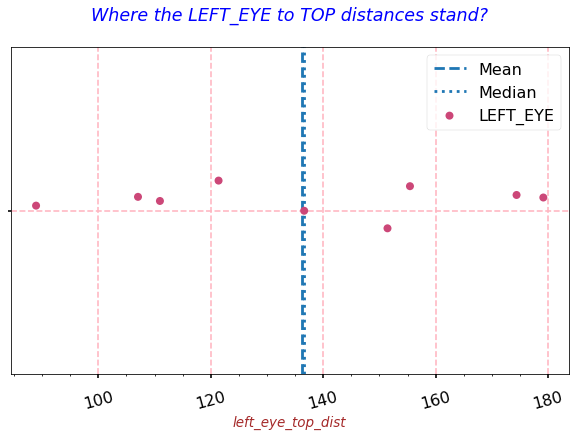

In [48]:
strip_plot(df=hp_engg_df, col='left_eye_top_dist', bp_label="left_eye", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples LEFT EYE to TOP distances and how far they are from the central aspects(mean or median).
    - Here, mean & median are lying on top of each other(means they are same).

### **Feature-4:`RIGHT_SHOULDER_top_dist`**

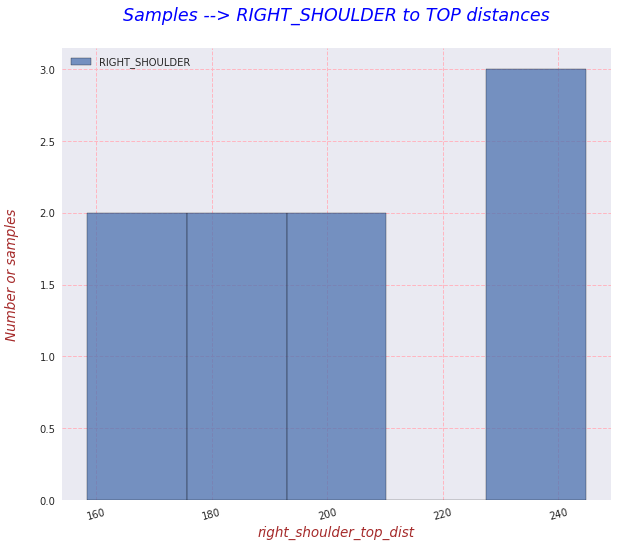

In [49]:
hist_plot(df=hp_engg_df, col='right_shoulder_top_dist', bp_label="right_shoulder", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to RIGHT SHOULDER distance.

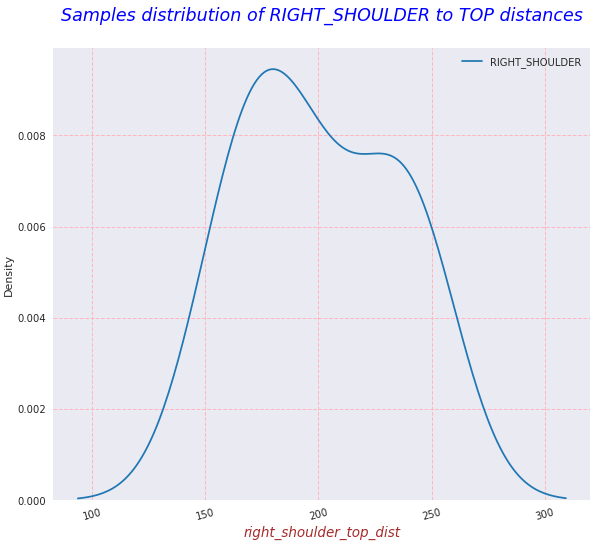

In [50]:
kde_plot(df=hp_engg_df, col='right_shoulder_top_dist', bp_label="right_shoulder", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the RIGHT SHOULDER to TOP distances of the samples are appears to be dual peaked.

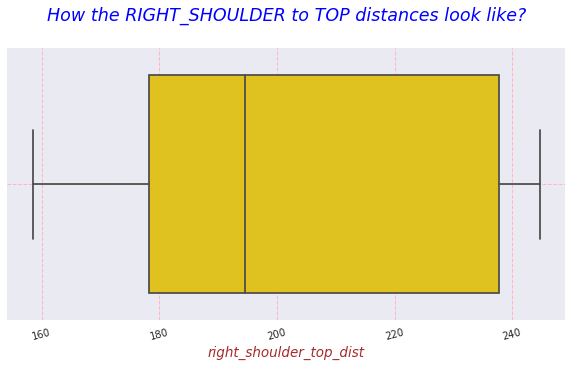

In [51]:
box_plot(df=hp_engg_df, col='right_shoulder_top_dist', bp_label="right_shoulder", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 175 to 235.

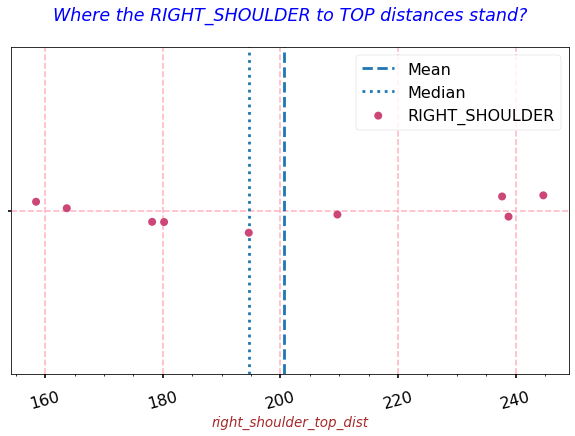

In [52]:
strip_plot(df=hp_engg_df, col='right_shoulder_top_dist', bp_label="right_shoulder", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples RIGHT SHOULDER to TOP distances and how far they are from the central aspects(mean or median).

### **Feature-5:`RIGHT_ELBOW_top_dist`**

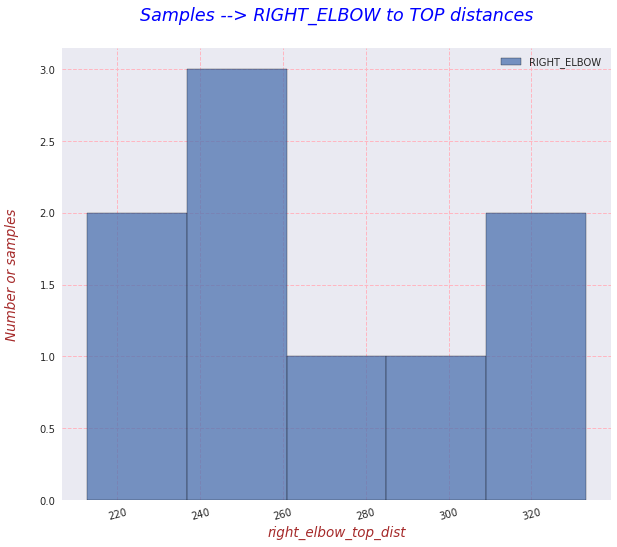

In [53]:
hist_plot(df=hp_engg_df, col='right_elbow_top_dist', bp_label="right_elbow", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to RIGHT ELBOW distance.

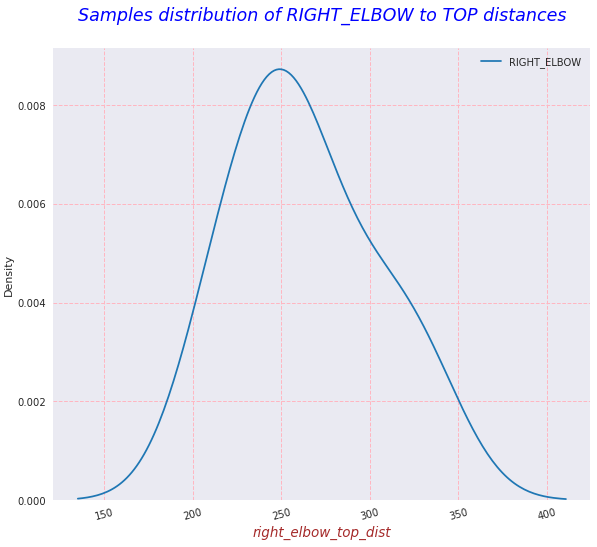

In [54]:
kde_plot(df=hp_engg_df, col='right_elbow_top_dist', bp_label="right_elbow", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the RIGHT ELBOW to TOP distances of the samples are appears to be normally distributed.

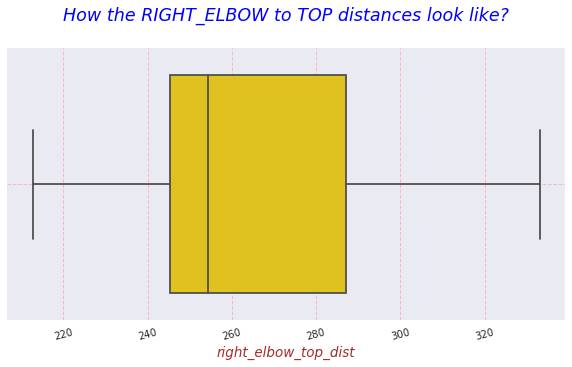

In [55]:
box_plot(df=hp_engg_df, col='right_elbow_top_dist', bp_label="right_elbow", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 245 to 290.

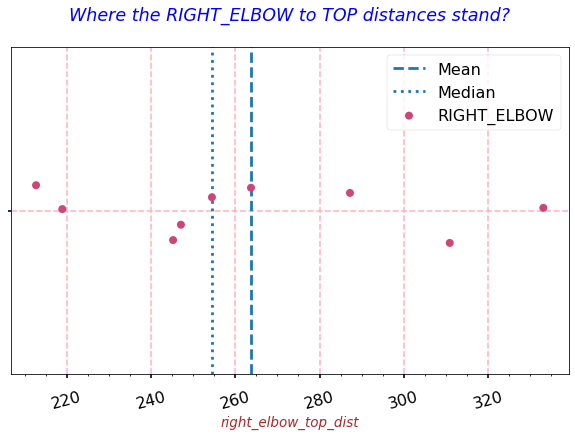

In [56]:
strip_plot(df=hp_engg_df, col='right_elbow_top_dist', bp_label="right_elbow", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples RIGHT ELBOW to TOP distances and how far they are from the central aspects(mean or median).

### **Feature-6:`LEFT_WRIST_top_dist`**

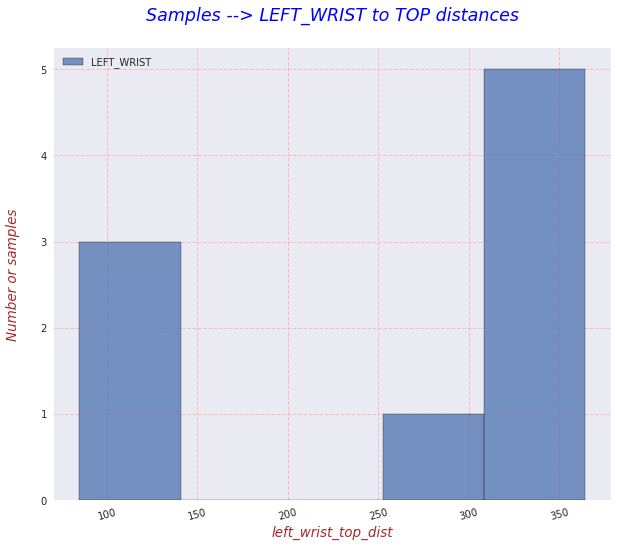

In [57]:
hist_plot(df=hp_engg_df, col='left_wrist_top_dist', bp_label="left_wrist", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to LEFT WRIST distance.

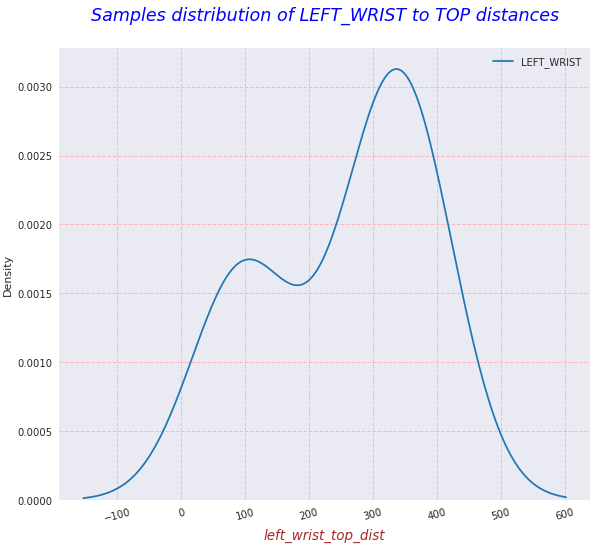

In [58]:
kde_plot(df=hp_engg_df, col='left_wrist_top_dist', bp_label="left_wrist", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the LEFT WRIST to TOP distances of the samples are appears to be dual peaked.

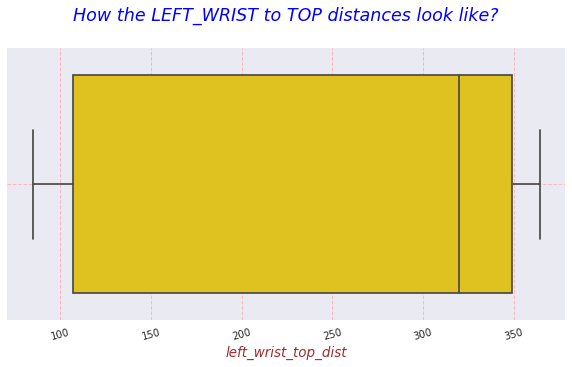

In [59]:
box_plot(df=hp_engg_df, col='left_wrist_top_dist', bp_label="left_wrist", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 110 to 350.

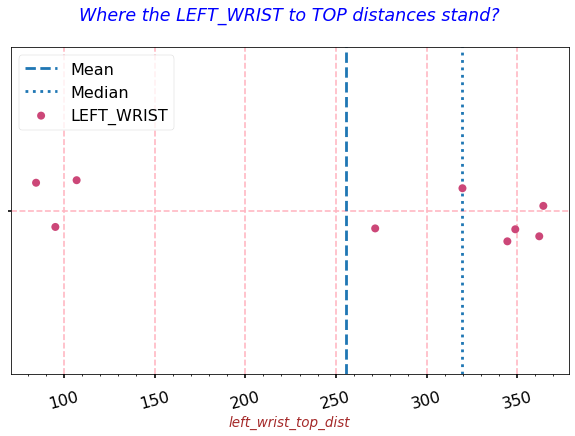

In [60]:
strip_plot(df=hp_engg_df, col='left_wrist_top_dist', bp_label="left_wrist", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples LEFT WRIST to TOP distances and how far they are from the central aspects(mean or median).
    - B/W 120 to 270 there are no samples.

### **Feature-7:`RIGHT_HIP_top_dist`**

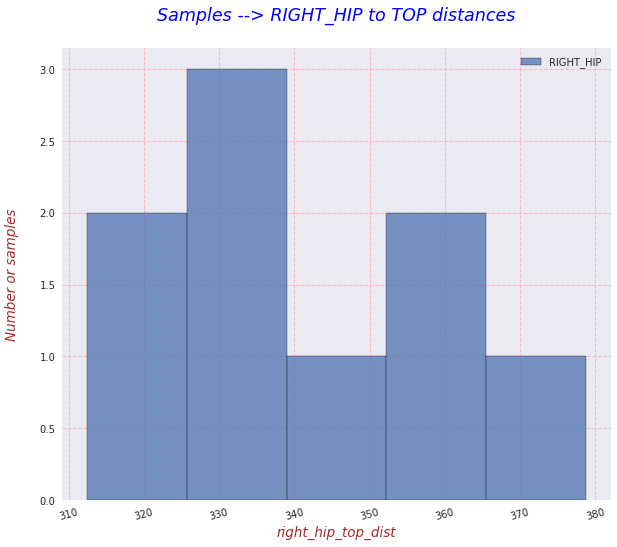

In [61]:
hist_plot(df=hp_engg_df, col='right_hip_top_dist', bp_label="right_hip", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same TOP to RIGHT HIP distance.

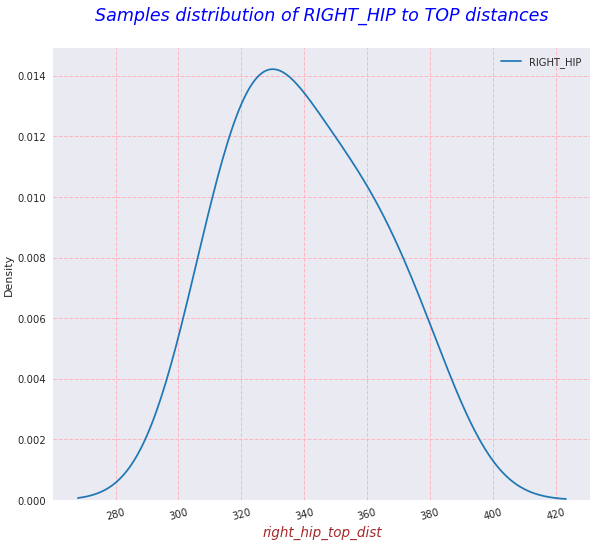

In [62]:
kde_plot(df=hp_engg_df, col='right_hip_top_dist', bp_label="right_hip", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the RIGHT HIP to TOP distances of the samples are appears to be normally distributed.

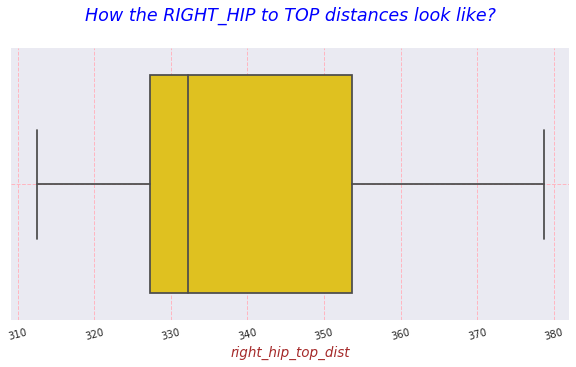

In [63]:
box_plot(df=hp_engg_df, col='right_hip_top_dist', bp_label="right_hip", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 325 to 355.

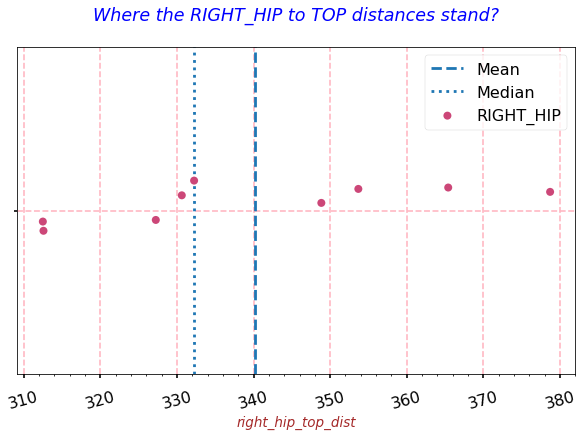

In [64]:
strip_plot(df=hp_engg_df, col='right_hip_top_dist', bp_label="right_hip", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples RIGHT HIP to TOP distances and how far they are from the central aspects(mean or median).

### **Feature-8:`LEFT_KNEE_bottom_dist`**

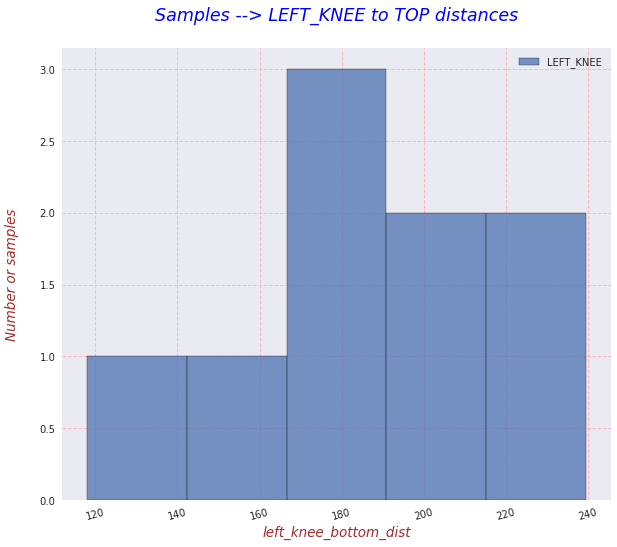

In [65]:
hist_plot(df=hp_engg_df, col='left_knee_bottom_dist', bp_label="left_knee", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same BOTTOM to LEFT KNEE distance.

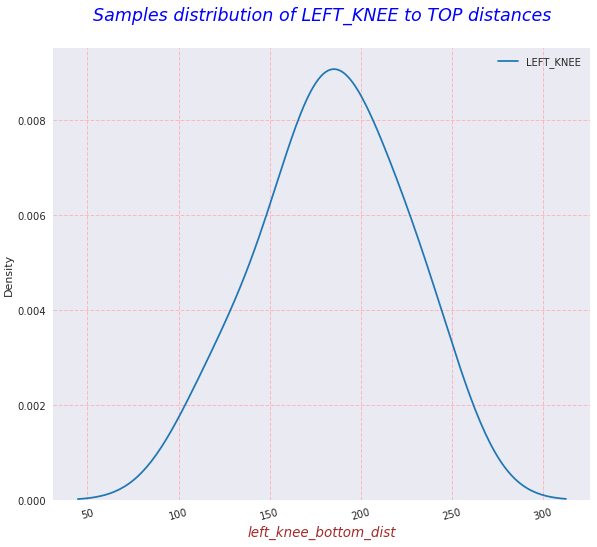

In [66]:
kde_plot(df=hp_engg_df, col='left_knee_bottom_dist', bp_label="left_knee", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the LEFT KNEE to BOTTOM distances of the samples are appears to be normally distributed.

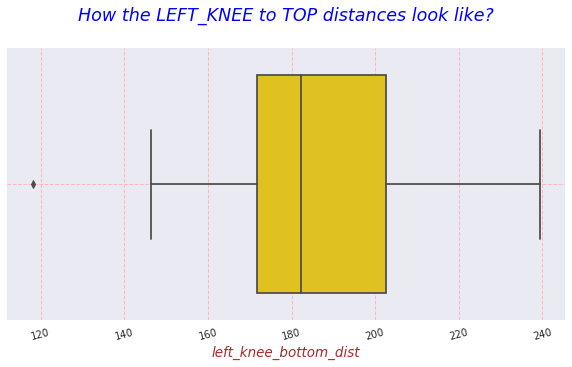

In [67]:
box_plot(df=hp_engg_df, col='left_knee_bottom_dist', bp_label="left_knee", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 170 to 200.

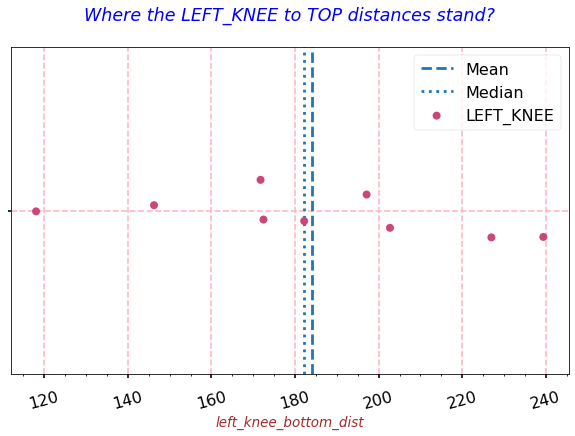

In [68]:
strip_plot(df=hp_engg_df, col='left_knee_bottom_dist', bp_label="left_knee", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples LEFT KNEE to BOTTOM distances and how far they are from the central aspects(mean or median).
    - Here, mean & median are very close to each other.

### **Feature-9:`RIGHT_ANKLE_bottom_dist`**

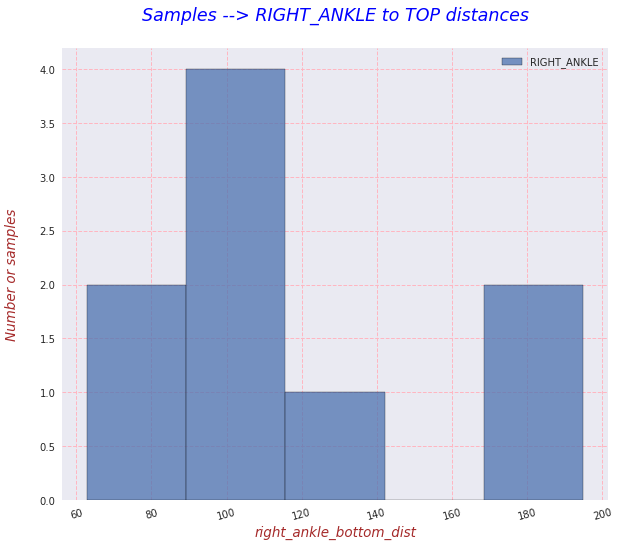

In [69]:
hist_plot(df=hp_engg_df, col='right_ankle_bottom_dist', bp_label="right_ankle", top_flag=True)

**`OBSERVATION`**
- Above plot telling us how many samples we have with the same BOTTOM to RIGHT ANKLE distance.

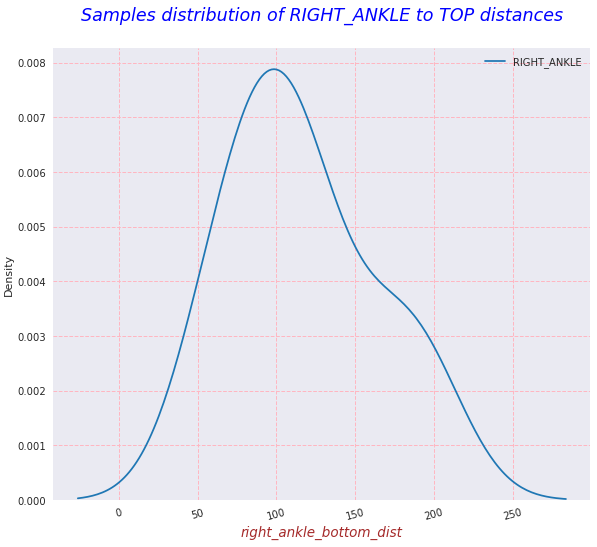

In [70]:
kde_plot(df=hp_engg_df, col='right_ankle_bottom_dist', bp_label="right_ankle", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that the RIGHT ANKLE to BOTTOM distances of the samples are appears to be normally distributed with a slight heavy right tail.

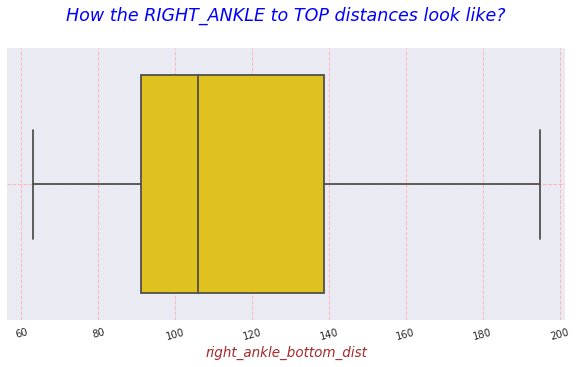

In [71]:
box_plot(df=hp_engg_df, col='right_ankle_bottom_dist', bp_label="right_ankle", top_flag=True)

**`OBSERVATION`**
- Above plot telling us that majority of the samples have values b/w 90 to 140.

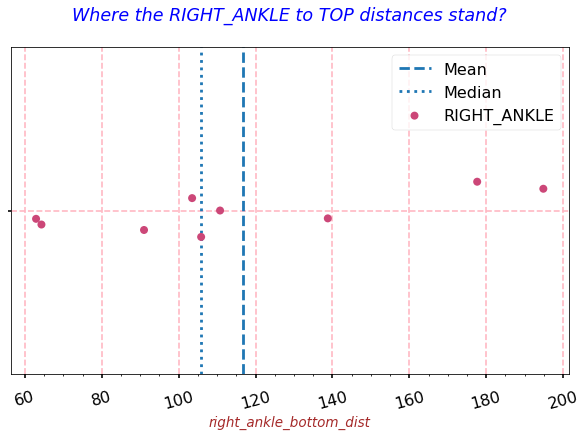

In [72]:
strip_plot(df=hp_engg_df, col='right_ankle_bottom_dist', bp_label="right_ankle", top_flag=True)

**`OBSERVATION`**
- Above plot showing us the samples RIGHT ANKLE to BOTTOM distances and how far they are from the central aspects(mean or median).

## ⭐ **`Extensive Data Analysis - II`**
#### **Here, I'll visualize the provided depth images and try to find some edges by using some simple techniques.**

In [73]:
hp_engg_df['Img_name'] = hp_engg_df['Img_name'].apply(lambda val: os.path.join(os.path.join(os.getcwd(), "Dataset"), val+".jpg"))
hp_engg_df

Img_name  nose_top_dist  \
0  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\1d5fe...        139.691   
1  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\1eddf...        219.240   
2  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\38e29...        114.684   
3  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\6cd5d...        150.096   
4  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\76ed6...         91.655   
5  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\8d23f...        190.423   
6  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\9dc3e...        142.212   
7  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\9dd02...        118.411   
8  E:\STUDY\PROJECTS\Assignment_CGM\Dataset\d3757...        179.026   

   nose_bottom_dist  left_eye_top_dist  left_eye_bottom_dist  \
0           453.810            151.440               460.771   
1           376.907            107.062               464.210   
2           464.978            121.393               460.750   
3           505.597            155.437               516.805   
4           500.699             88.932               502.501   
5           472.569            179.159               487.789   
6           458.133            136.621               473.452   
7           437.884            110.964               454.636   
8           501.837            174.395               509.670   

   right_eye_top_dist  right_eye_bottom_dist  left_ear_top_dist  \
0             113.032                476.286            180.259   
1             208.241                395.238            139.040   
2             209.028                415.961            139.339   
3             127.744                524.638            185.402   
4              89.834                501.079            122.090   
5             172.724                488.188            131.322   
6             116.796                480.265            155.741   
7              96.762                457.973            135.269   
8             176.691                516.647            111.132   

   left_ear_bottom_dist  right_ear_top_dist  right_ear_bottom_dist  \
0               445.126             101.246                478.053   
1               432.574             202.198                386.158   
2               438.516             210.612                412.764   
3               504.764             125.420                520.907   
4               470.116             167.362                470.016   
5               488.105             136.639                483.716   
6               472.965             103.867                489.563   
7               443.555             101.644                451.652   
8               530.799             170.003                517.505   

   left_shoulder_top_dist  left_shoulder_bottom_dist  right_shoulder_top_dist  \
0                 224.946                    388.402                  163.677   
1                 170.682                    399.706                  237.697   
2                 180.103                    396.358                  244.709   
3                 242.182                    436.003                  178.191   
4                 160.697                    430.627                  194.623   
5                 169.193                    435.949                  209.694   
6                 221.702                    394.308                  180.226   
7                 199.977                    375.700                  158.455   
8                 173.186                    468.816                  238.792   

   right_shoulder_bottom_dist  left_elbow_top_dist  left_elbow_bottom_dist  \
0                     412.205              291.861                 332.618   
1                     349.583              130.723                 440.394   
2                     353.241              117.177                 462.027   
3                     464.880              308.353                 359.789   
4                     439.693              129.537                 468.497   
5                     408.771            

### **Lets_plot_some_depth_images_here..**

#### **👧👦 `Chidlren - I`**

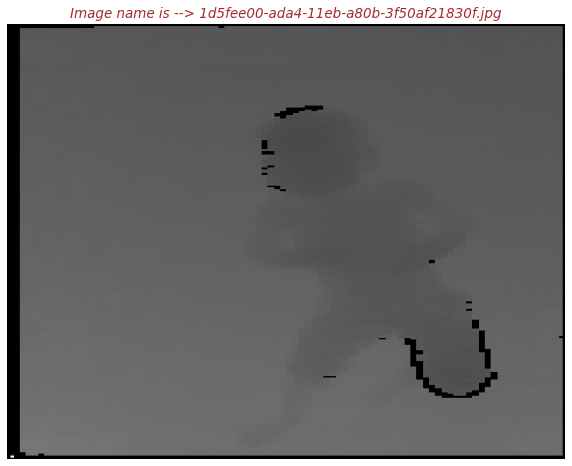

In [74]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    img = cv2.imread(hp_engg_df['Img_name'].iloc[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Displaying the image and setting its title
    plt.imshow(img, aspect='auto')
    plt.axis('off')
    plt.title("Image name is --> {}".format(hp_engg_df['Img_name'].iloc[0].split("\\")[-1]), fontdict=label_font_dict)

**`OBSERVATION`**
- If we closely observe the above image then we can say that the children or to be in-focussed object is in the lower right corner of the image. 
    - And, some of the boundaries have black pixels.
    - And, children is in a moving state.

#### **👧👦 `Chidlren - II`**

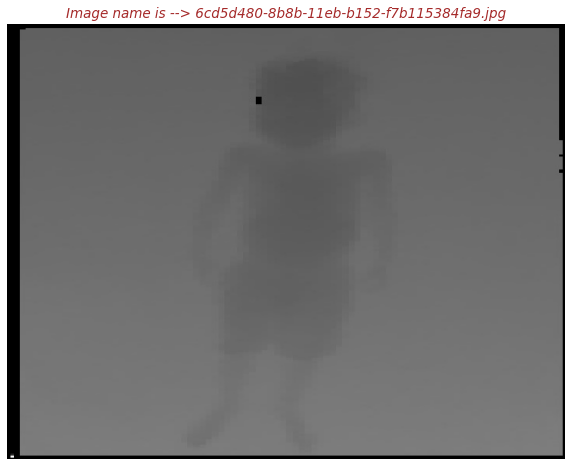

In [75]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    img = cv2.imread(hp_engg_df['Img_name'].iloc[3])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Displaying the image and setting its title
    plt.imshow(img, aspect='auto')
    plt.axis('off')
    plt.title("Image name is --> {}".format(hp_engg_df['Img_name'].iloc[3].split("\\")[-1]), fontdict=label_font_dict)

**`OBSERVATION`**
- If we closely observe the above image then we can say that the children or to be in-focussed object is in the center of the image. 
    - And, only a few boundary pixels of the face are black.
    - And, children is standing in a still position.

#### **👧👦 `Chidlren - III`**

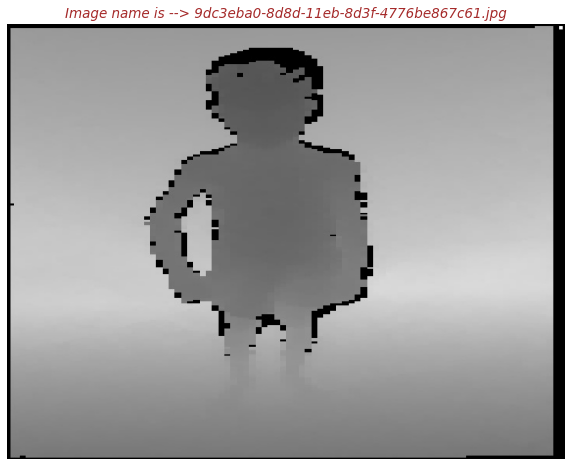

In [76]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    img = cv2.imread(hp_engg_df['Img_name'].iloc[6])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Displaying the image and setting its title
    plt.imshow(img, aspect='auto')
    plt.axis('off')
    plt.title("Image name is --> {}".format(hp_engg_df['Img_name'].iloc[6].split("\\")[-1]), fontdict=label_font_dict)

**`OBSERVATION`**
- If we closely observe the above image then we can say that the children or to be in-focussed object is in the center of the image. 
    - And, the boundary pixels of the children are black.
    - And, children is standing in a still position.
    - And, feet of the children are not clearly visible.

#### **👧👦 `Chidlren - IV`**

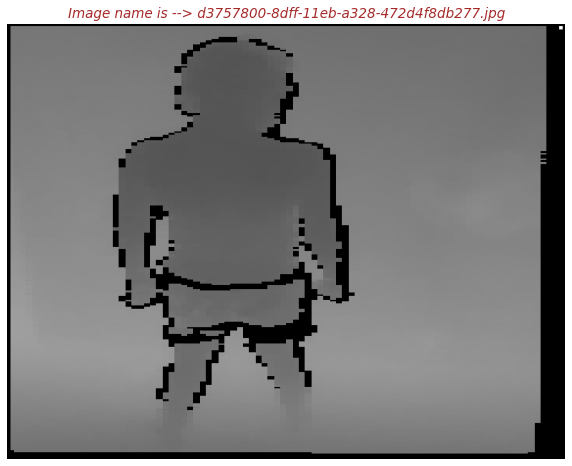

In [77]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    img = cv2.imread(hp_engg_df['Img_name'].iloc[8])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Displaying the image and setting its title
    plt.imshow(img, aspect='auto')
    plt.axis('off')
    plt.title("Image name is --> {}".format(hp_engg_df['Img_name'].iloc[8].split("\\")[-1]), fontdict=label_font_dict)

**`OBSERVATION`**
- If we closely observe the above image then we can say that the children or to be in-focussed object is in the center of the image. 
    - And, the boundary pixels of the children are black.
    - And, children is standing in a still position.
    - And, feet of the children are not clearly visible.

### **`Query`**
#### **🙋‍♂️ Why in some of the images the boundary pixels of the children are too dark or black❓ And, in others they are just like the inner region❓**

![query_1](E:\STUDY\PROJECTS\Assignment_CGM\Doc_Images\result.jpg)

**`OBSERVATION`**
- So, after closely observing the provided images I found that in some of the images the boundary pixels of focussed object are very dark. This can be potentially of various reasons:
    - Due to the limitations of the device that was used to capture the images.
        - Referred [Link](https://stackoverflow.com/questions/23627319/black-region-in-kinect-depth-image)
    - Due to insufficient lightning or reflection in the room where the volunteer is collecting the data.
        - Referred [Link](https://stackoverflow.com/questions/45352544/how-to-fill-the-black-patches-in-a-kinect-v1-depth-image)
    - This might be introduced while converting the 360 degree point cloud videos into the depth images.

## ⭐ **`Extensive Data Analysis - III`**
#### **Here, I'll try to perform some image smoothing & basic edge detection.**

In [78]:
all_images_loc = os.path.join(os.getcwd(), "Dataset")
all_images_loc

'E:\\STUDY\\PROJECTS\\Assignment_CGM\\Dataset'

In [79]:
hp_engg_df['Img_name'].iloc[4]

'E:\\STUDY\\PROJECTS\\Assignment_CGM\\Dataset\\76ed6fc0-8e1d-11eb-ad70-7be1a1219834.jpg'

## **⭐Image_Smoothing**

### **1a. ==> `Image Filtering`**

In [80]:
# Read the image
img = cv2.imread(hp_engg_df['Img_name'].iloc[6])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[[ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 ...
 [51 51 51]
 [63 63 63]
 [76 76 76]] 



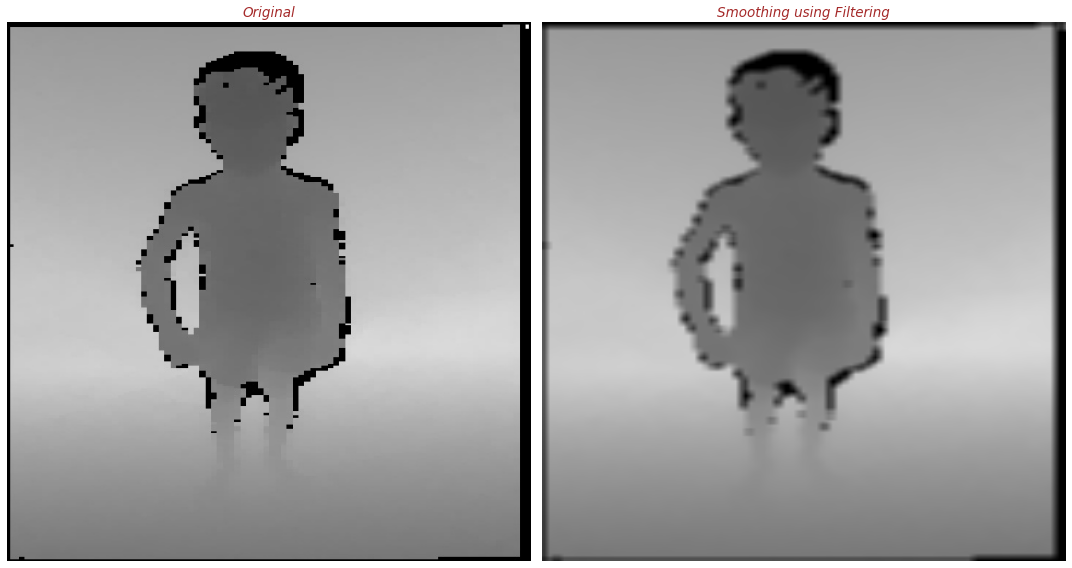

In [81]:
# Defining the kernel
kernel = np.ones((9,9),np.float32)/81
img_filtering = cv2.filter2D(img, ddepth=-1, kernel=kernel)

# Print Just few cells
print(img_filtering[0], "\n")

# Visualize the original & filtered image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # Filtered image
    ax[1].imshow(img_filtering, aspect='auto')
    ax[1].set_title("Smoothing using Filtering", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

**`OBSERVATION`**

- The above operation tells us that if the kernel size is bigger then the smoothing operation will be much more evident or its intensity will be higher.

### **1b. ==> `Image Blurring`**

#### **1. `Averaging`**
- This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element.

[[ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 ...
 [51 51 51]
 [63 63 63]
 [76 76 76]] 

Does image filtering and avg blurring yields the same resultant array? --> True



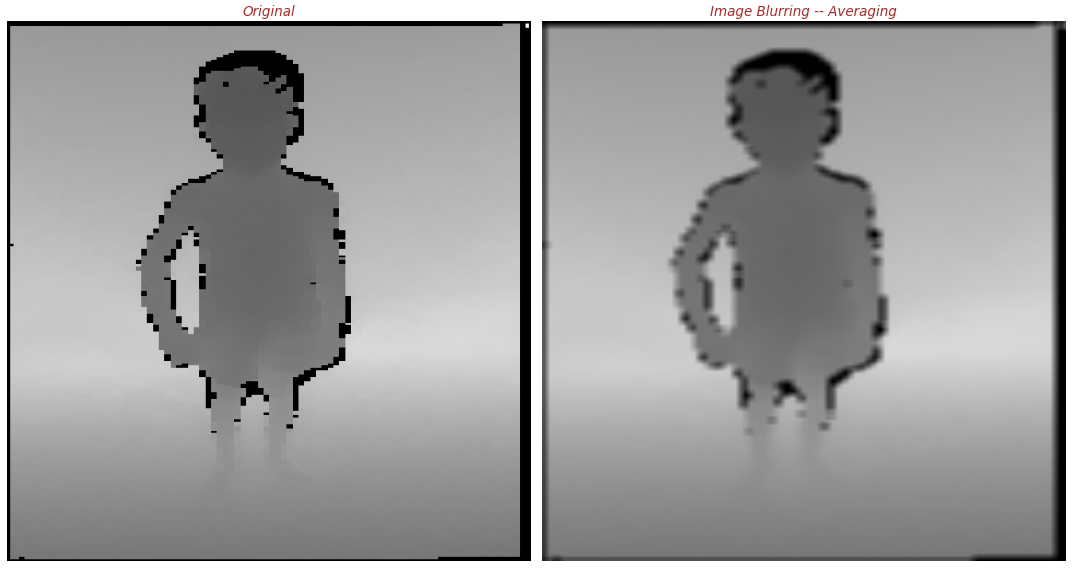

In [82]:
# Image blurring -- averaging
img_avg_blur = cv2.blur(img, ksize=(9,9))

# Print Just few cells
print(img_avg_blur[0], "\n")

# Does image filtering and avg blurring yields the same resultant array?
print("Does image filtering and avg blurring yields the same resultant array? --> {}\n".format(np.all(np.ravel(img_filtering) == np.ravel(img_avg_blur)), "\n"))

# Visualize the original & blurred image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # Averaging Blur image
    ax[1].imshow(img_avg_blur, aspect='auto')
    ax[1].set_title("Image Blurring -- Averaging", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

#### **2. `Gaussian Blurring`**
- In this method, instead of a box filter, a Gaussian kernel is used. 
    - We should specify the width and height of the kernel which should be positive and odd. 
    - We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. 
        - If only sigmaX is specified, sigmaY is taken as the same as sigmaX. 
        - If both are given as zeros, they are calculated from the kernel size. 
    - Gaussian blurring is highly effective in removing Gaussian noise from an image.

[[ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 ...
 [51 51 51]
 [63 63 63]
 [76 76 76]] 

Does image avg blurring and gauss blurring yields the same resultant array? --> True



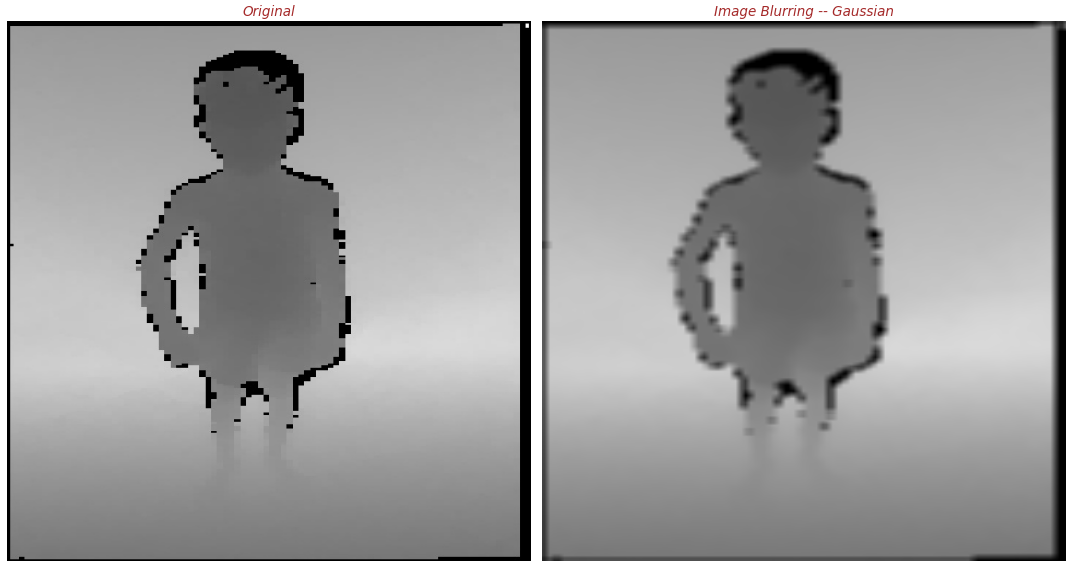

In [83]:
# Image blurring -- gaussian
img_gauss_blur = cv2.blur(img, ksize=(9,9))

# Print Just few cells
print(img_gauss_blur[0], "\n")

# Does image avg blurring and gauss blurring yields the same resultant array?
print("Does image avg blurring and gauss blurring yields the same resultant array? --> {}\n".format(np.all(np.ravel(img_avg_blur) == np.ravel(img_gauss_blur)), "\n"))

# Visualize the original & gauss blurred image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # Gaussian blur image
    ax[1].imshow(img_gauss_blur, aspect='auto')
    ax[1].set_title("Image Blurring -- Gaussian", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

#### **3. `Median Blurring`**
- It takes the median of all the pixels under the kernel area and the central element is replaced with this median value. 
    - This is highly effective against salt-and-pepper noise in an image. 
    - Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. 
        - But in median blurring, the central element is always replaced by some pixel value in the image. 
    - It reduces the noise effectively. Its kernel size should be a positive odd integer.

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [1 1 1]
 [1 1 1]] 

Does image avg blurring and median blurring yields the same resultant array? --> False



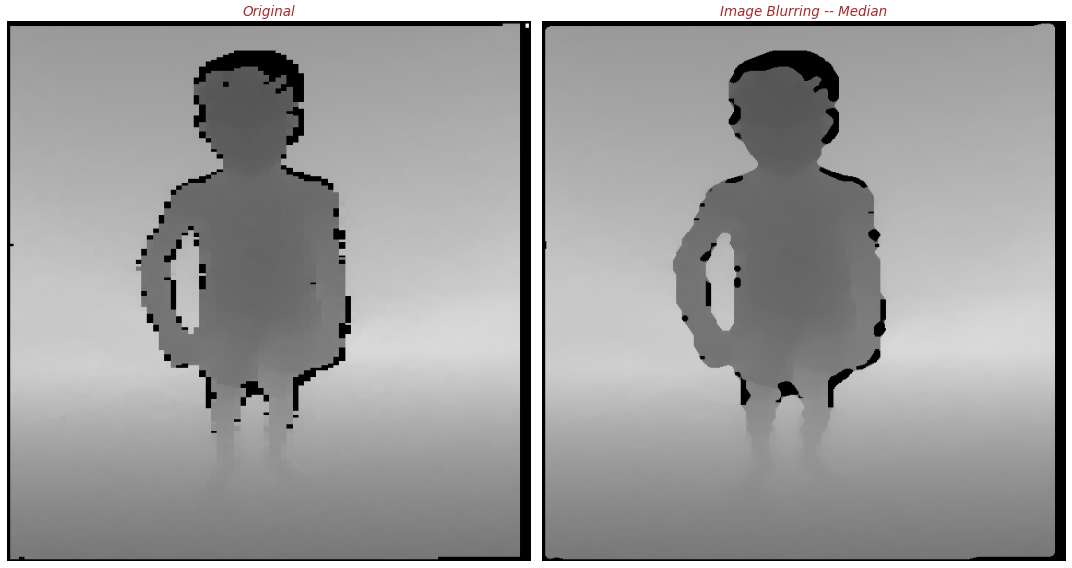

In [84]:
# Image blurring -- median
img_median_blur = cv2.medianBlur(img, ksize=9)

# Print Just few cells
print(img_median_blur[0], "\n")

# Does image avg blurring and median blurring yields the same resultant array?
print("Does image avg blurring and median blurring yields the same resultant array? --> {}\n".format(np.all(np.ravel(img_avg_blur) == np.ravel(img_median_blur)), "\n"))

# Visualize the original & median blurred image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # Median blur image
    ax[1].imshow(img_median_blur, aspect='auto')
    ax[1].set_title("Image Blurring -- Median", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

#### **4. `Bi-lateral Filtering`**
- It is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. 
- We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. 
    - This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. 
    - It doesn't consider whether pixels have almost the same intensity. 
    - It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.


- Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. 
    - The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. 
        - So, it preserves the edges since pixels at edges will have large intensity variation.

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]] 

Does image gaussian blurring and bi-lateral filtering yields the same resultant array? --> False



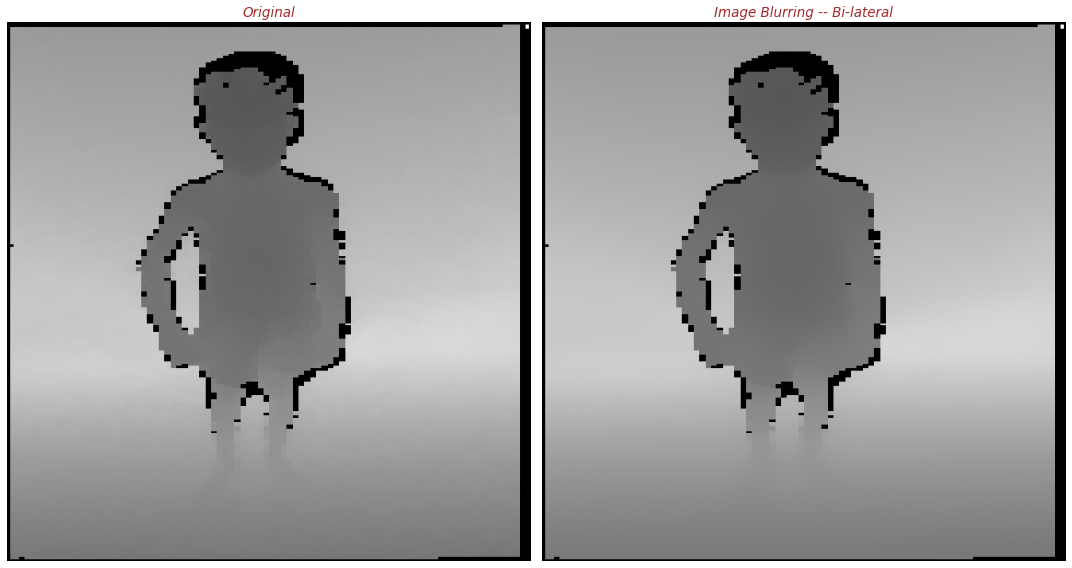

In [85]:
# Image blurring -- bi-lateral
img_bilateral_blur = cv2.bilateralFilter(img, d=41, sigmaColor=25, sigmaSpace=175)

# Print Just few cells
print(img_bilateral_blur[0], "\n")

# Does image avg blurring and median blurring yields the same resultant array?
print("Does image gaussian blurring and bi-lateral filtering yields the same resultant array? --> {}\n".format(np.all(np.ravel(img_gauss_blur) == np.ravel(img_bilateral_blur)), "\n"))

# Visualize the original & median blurred image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # Bi-lateral filtering image
    ax[1].imshow(img_bilateral_blur, aspect='auto')
    ax[1].set_title("Image Blurring -- Bi-lateral", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

**`OBSERVATION`**

- The biggest difference b/w the MEDIAN, GAUSSIAN and Bi-lateral filtering is quite evident in the above o/p. 

### **1c. ==> `Image De-noising`**

[[0 0 0]
 [1 1 1]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [1 1 1]] 

Does image bi-lateral filtering and de-noising yields the same resultant array? --> False



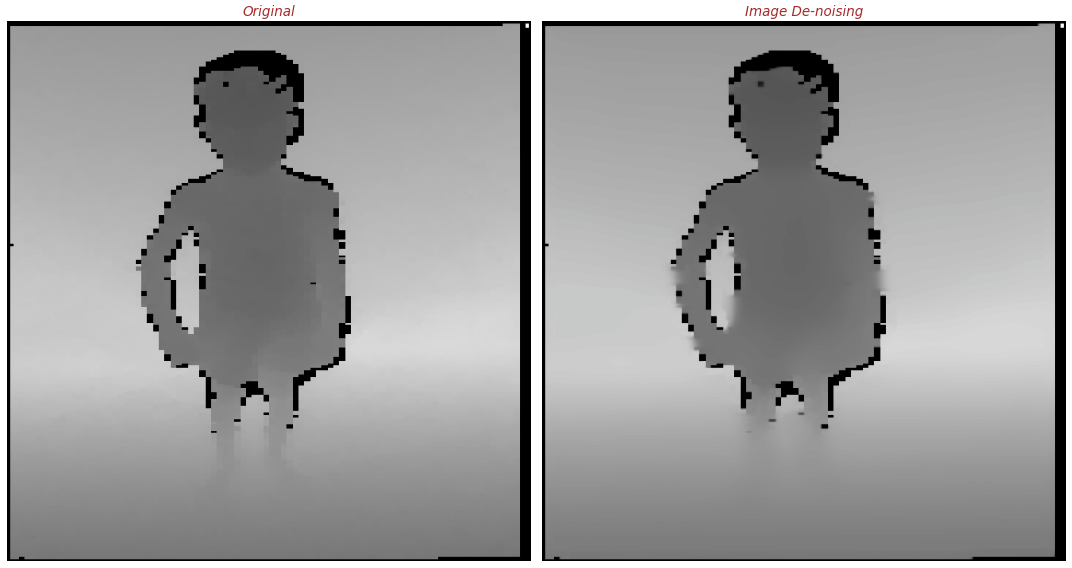

In [86]:
# Image de-noising
img_dn = cv2.fastNlMeansDenoisingColored(img, dst=None, h=21, hColor=21, templateWindowSize=21, searchWindowSize=31)

# Print Just few cells
print(img_dn[0], "\n")

# Does image bi-lateral filtering and image de-noising yields the same resultant array?
print("Does image bi-lateral filtering and de-noising yields the same resultant array? --> {}\n".format(np.all(np.ravel(img_bilateral_blur) == np.ravel(img_dn)), "\n"))

# Visualize the original & de-noised image
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharex=True, sharey=True)
    # Original image
    ax[0].imshow(img, aspect='auto')
    ax[0].set_title("Original", fontdict= label_font_dict)
    ax[0].axis("off")
    
    # De-noised image
    ax[1].imshow(img_dn, aspect='auto')
    ax[1].set_title("Image De-noising", fontdict= label_font_dict)
    ax[1].axis("off")
    plt.tight_layout()

**`OBSERVATION`**

- In the image de-noising, it is very evident that the non-black boundaries of the object are quite smoothed as compared to the original image.

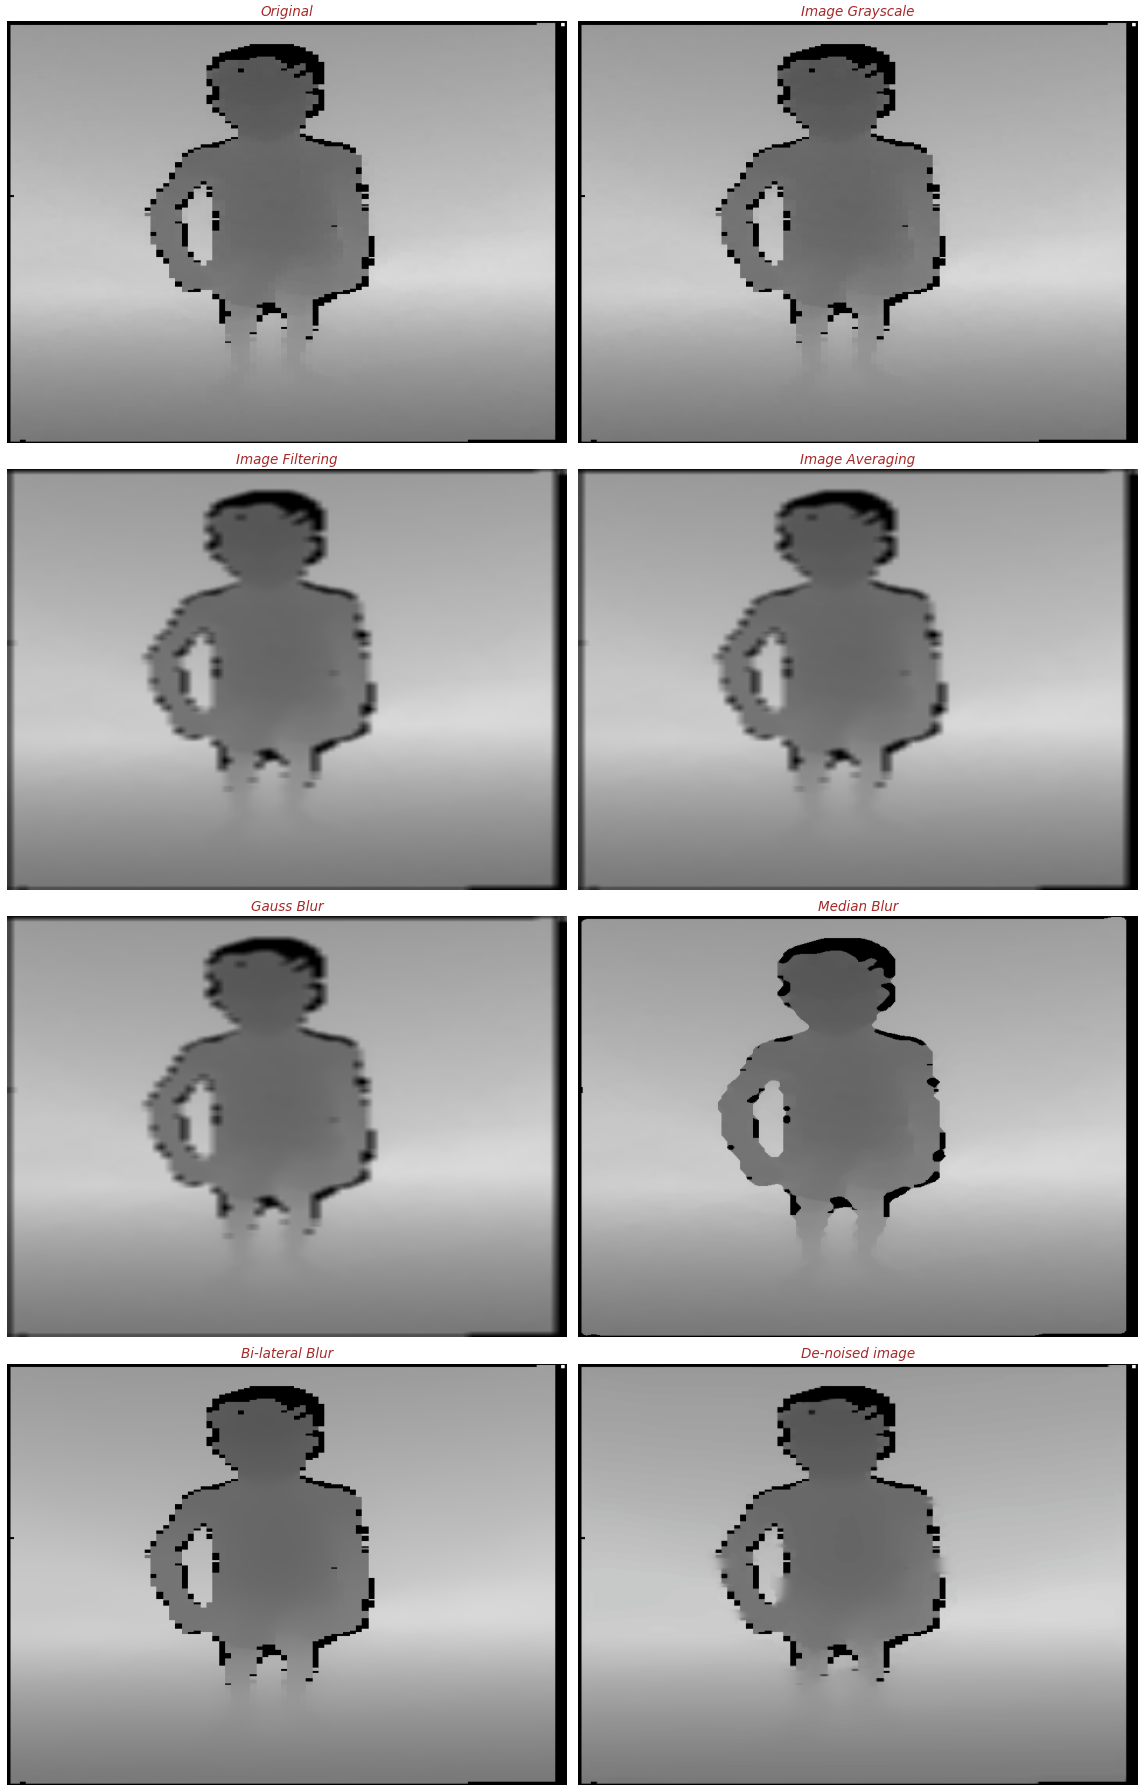

In [87]:
# Grayscale image
img_gray = cv2.imread(hp_engg_df['Img_name'].iloc[6])

# All techniques at one place
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,25), sharex=True, sharey=True)
    # Original image
    ax[0,0].imshow(img, aspect='auto')
    ax[0,0].set_title("Original", fontdict= label_font_dict)
    ax[0,0].axis("off")
    
    # Grayscale image
    ax[0,1].imshow(img_gray, aspect='auto')
    ax[0,1].set_title("Image Grayscale", fontdict= label_font_dict)
    ax[0,1].axis("off")
    
    # Image after filtering image
    ax[1,0].imshow(img_filtering, aspect='auto')
    ax[1,0].set_title("Image Filtering", fontdict= label_font_dict)
    ax[1,0].axis("off")
    
    # Image after average blurring
    ax[1,1].imshow(img_avg_blur, aspect='auto')
    ax[1,1].set_title("Image Averaging", fontdict= label_font_dict)
    ax[1,1].axis("off")
    
    # Image after gaussian blurring
    ax[2,0].imshow(img_gauss_blur, aspect='auto')
    ax[2,0].set_title("Gauss Blur", fontdict= label_font_dict)
    ax[2,0].axis("off")
    
    # Image after median blurring
    ax[2,1].imshow(img_median_blur, aspect='auto')
    ax[2,1].set_title("Median Blur", fontdict= label_font_dict)
    ax[2,1].axis("off")
    
    # Image after bi-lateral filtering
    ax[3,0].imshow(img_bilateral_blur, aspect='auto')
    ax[3,0].set_title("Bi-lateral Blur", fontdict= label_font_dict)
    ax[3,0].axis("off")
    
    # Image after de-noising
    ax[3,1].imshow(img_dn, aspect='auto')
    ax[3,1].set_title("De-noised image", fontdict= label_font_dict)
    ax[3,1].axis("off")
    plt.tight_layout()

**`OBSERVATION`**

- Image filtering, Image Average Blurring and Iage Gaussian Blurring are just like one another.
    - For gaussian blurring, we would have observed different results based on the value of sigma.
    

- Bi-lateral blur and De-noising are behaving in the similar manner apart from the slight smoothing of the non-black boundary pixels of the object in the latter.

- Median blurring the image looks more stable as here we got rid-off the noise and imp features are still visible.

## **⭐Image_Gradients_&_Edges**

- Image gradients are the rate of change of pixel values in either x or y direction or in both x and y directions. 
- It helps identify the sudden changes in pixel values. In other words, it helps detect the edges. 
    - If the gradient is applied in x-direction, vertical edges are detected. 
    - If the gradient is applied in y-direction, horizontal edges are detected.
- In OpenCV, Laplacian gradient detects edges both horizontally and vertically, while Sobel gradient detects edges either horizontally or vertically.
- **`Edge detection`** is one of the fundamental operation in image processing. Using this, we can reduce the amount of pixels while maintaining the structural aspects of the images.

#### **`Types of filters`**

- `Sobel` : This filter simply adds a little bit more weight or value to the middle.
    - First derivative based Sobel filter(for thicker edges)
- `Scharr` : Besides adding even more weight to the middle, this filter also adds weight to the sides
- `Laplacian` : Second derivative based Laplacian filter(for finer edges)

In [88]:
def sobel_edge_detection(image):
    """
    Description : This function is performing the SOBEL edge detection horizontally and vertically.
    
    Input parameters : It accepts below inputs:
        - Original Image
        - Depth of the destination image
        - Order of derivative x --> horizontally
        - Order of derivative y --> vertically
        - Kernel size for convolutions
    
    Returns : It returns 2 objects:
        - sobel_x : Edge detected on x axis
        - sobel_y : Edge detected on y axis
    """
    # Horizontal edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 7)
    
    # Vertical edge detection
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 7)
    
    # Laplacian edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize = 7)
    
    # Laplacian edge detection
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    
    # Laplacian edge detection
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    return sobel_x, sobel_y, laplacian, scharr_x, scharr_y

In [89]:
# Reading the image
img2 = cv2.imread(hp_engg_df['Img_name'].iloc[2])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Image blurring -- median
img_dn2 = cv2.medianBlur(img2, ksize=9)

# SOBEL edge detection
sobel_img_x, sobel_img_y, laplacian, schrr_x, schrr_y = sobel_edge_detection(img_dn2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


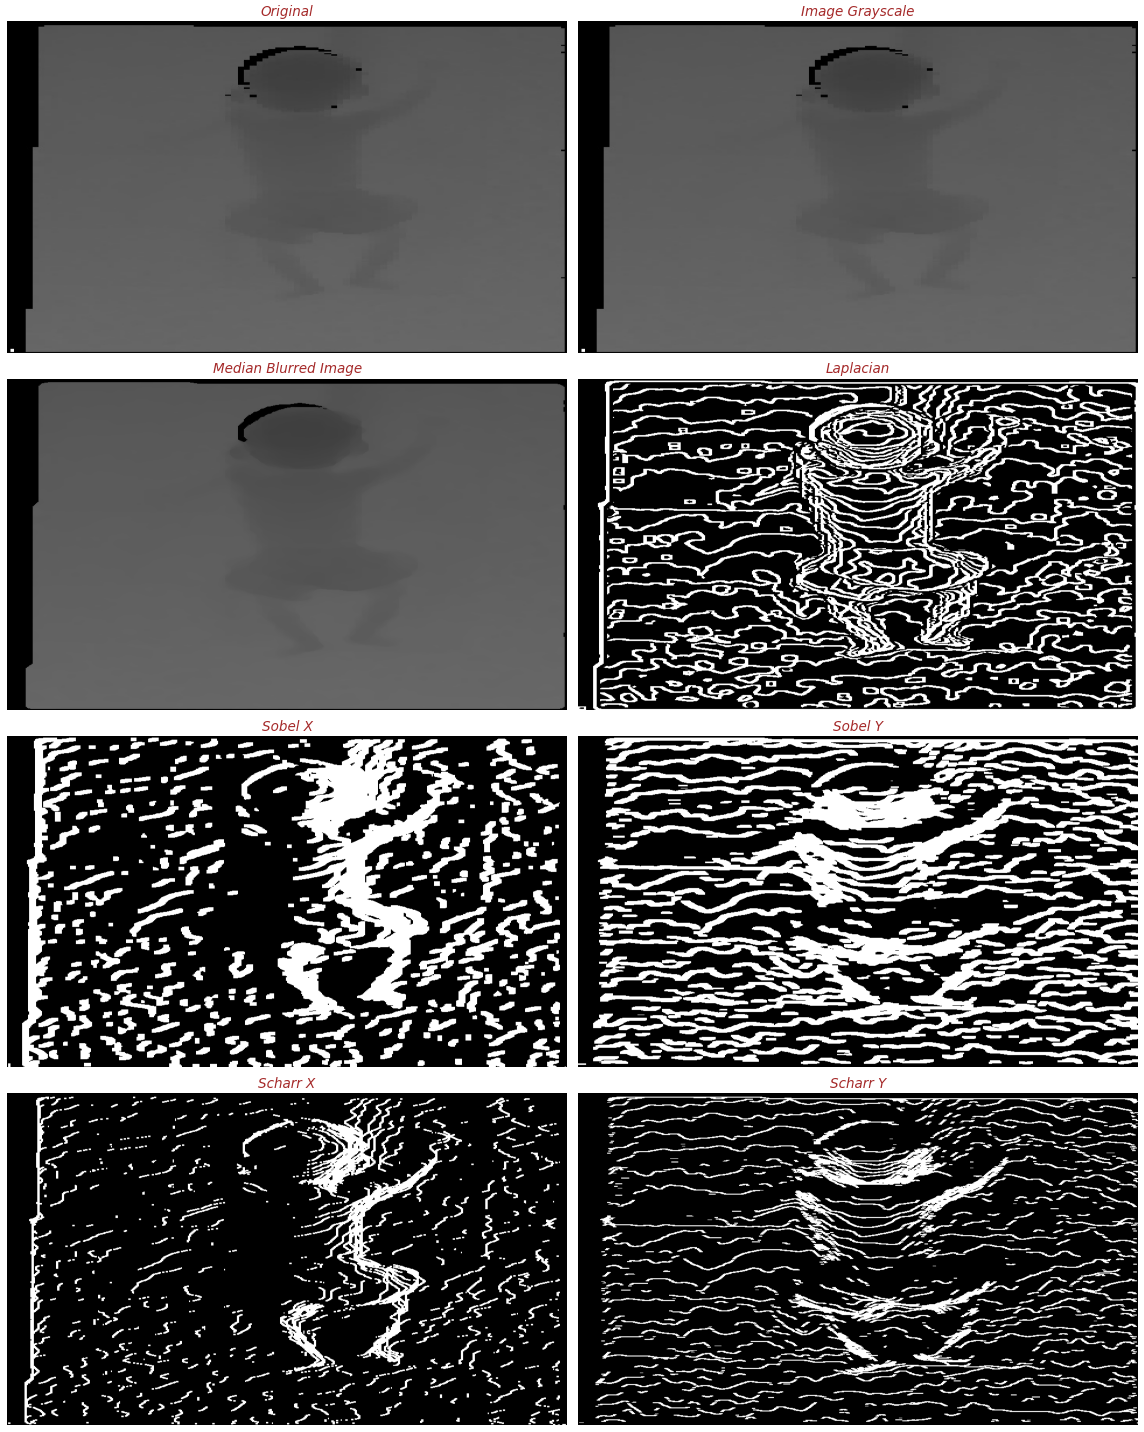

In [90]:
# Grayscale image
img_gray2 = cv2.imread(hp_engg_df['Img_name'].iloc[2])

# All techniques at one place
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,20), sharex=True, sharey=True)
    # Original image
    ax[0,0].imshow(img2, aspect='auto')
    ax[0,0].set_title("Original", fontdict= label_font_dict)
    ax[0,0].axis("off")
    
    # Grayscale image
    ax[0,1].imshow(img_gray2, aspect='auto')
    ax[0,1].set_title("Image Grayscale", fontdict= label_font_dict)
    ax[0,1].axis("off")
    
    # Median Blur image
    ax[1,0].imshow(img_dn2, aspect='auto')
    ax[1,0].set_title("Median Blurred Image", fontdict= label_font_dict)
    ax[1,0].axis("off")
    
    # Laplacian edge detection
    ax[1,1].imshow(laplacian, aspect='auto')
    ax[1,1].set_title("Laplacian", fontdict= label_font_dict)
    ax[1,1].axis("off")   
    
    # SOBEL Horizontal edge detection
    ax[2,0].imshow(sobel_img_x, aspect='auto')
    ax[2,0].set_title("Sobel X", fontdict= label_font_dict)
    ax[2,0].axis("off")
    
    # SOBEL Vertical edge detection
    ax[2,1].imshow(sobel_img_y, aspect='auto')
    ax[2,1].set_title("Sobel Y", fontdict= label_font_dict)
    ax[2,1].axis("off")
    
    # SCHARR Horizontal edge detection
    ax[3,0].imshow(schrr_x, aspect='auto')
    ax[3,0].set_title("Scharr X", fontdict= label_font_dict)
    ax[3,0].axis("off")
    
    # SCHARR Vertical edge detection
    ax[3,1].imshow(schrr_y, aspect='auto')
    ax[3,1].set_title("Scharr Y", fontdict= label_font_dict)
    ax[3,1].axis("off")
    plt.tight_layout()

**`OBSERVATION`**

- After seeing the above results we can say that the Sobel, Laplacian and Scharr filters are unable to capture the edges prominently.

## **⭐Sobel_v/s_Canny_Edge_Detection_Techniques**

In [91]:
def canny_edge_detection(image, th1=70, th2=100, L2_grad_flag=True):
    """
    Description : This function is performing the Canny edge detection in an image.
    
    Input parameters : It accepts below inputs:
        - Original Image
        - Threshold 1
        - Threshold 2
        - L2_grad_flag
    
    Returns : It returns the single o/p array:
        - Finds edges in an image using the Canny algorithm with custom image gradient.
    """
    # Canny edge detection
    canny_edg_det_img = cv2.Canny(image, th1, th2, L2_grad_flag)

    return canny_edg_det_img

In [92]:
# Index of image that will be used
img_idx = 7

# Reading the image
img3 = cv2.imread(hp_engg_df['Img_name'].iloc[img_idx])
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Image blurring -- median
img_dn3 = cv2.medianBlur(img3, ksize=9)

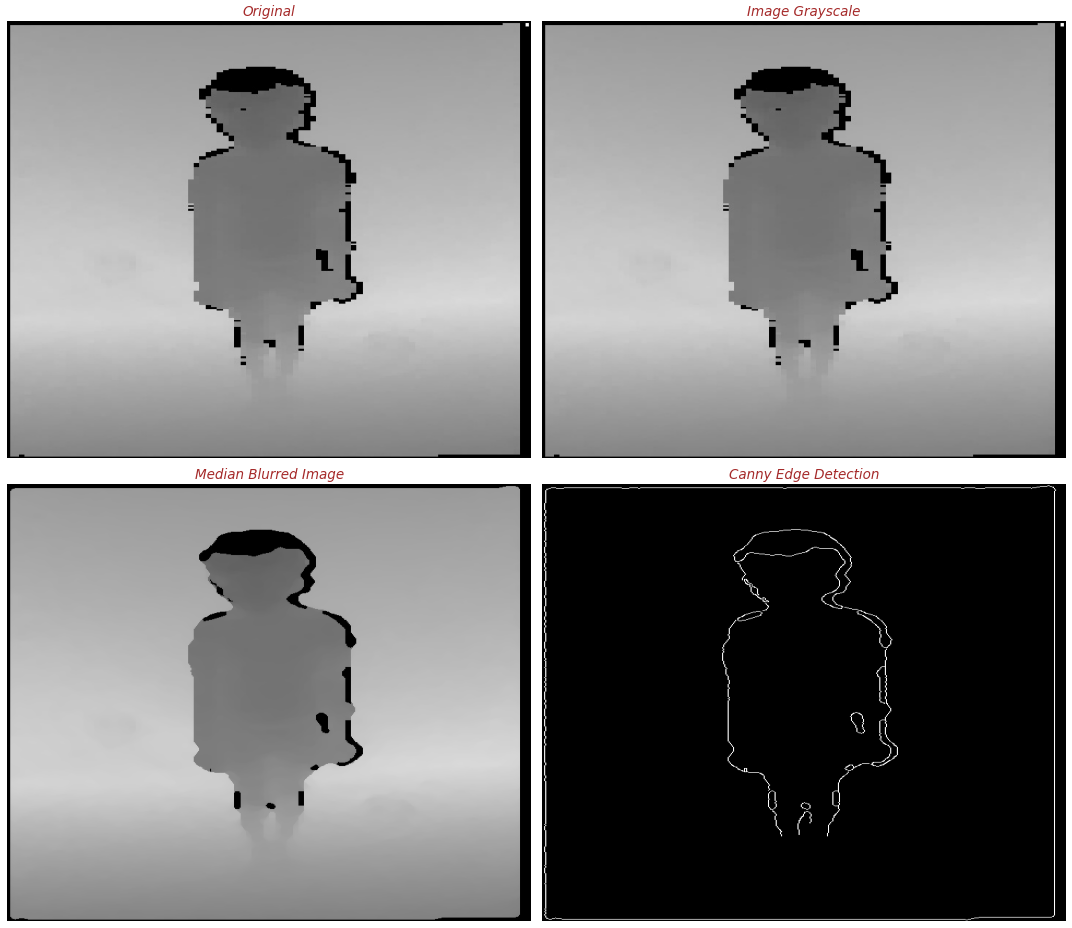

In [93]:
# Canny edge detection
min_val = 25
max_val = 60
canny_edges = canny_edge_detection(img_dn3, min_val, max_val, True)

# Grayscale image
img_gray3 = cv2.imread(hp_engg_df['Img_name'].iloc[img_idx])

# All techniques at one place
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,13), sharex=True, sharey=True)
    # Original image
    ax[0,0].imshow(img3, aspect='auto')
    ax[0,0].set_title("Original", fontdict= label_font_dict)
    ax[0,0].axis("off")
    
    # Grayscale image
    ax[0,1].imshow(img_gray3, aspect='auto')
    ax[0,1].set_title("Image Grayscale", fontdict= label_font_dict)
    ax[0,1].axis("off")
    
    # Median Blur image
    ax[1,0].imshow(img_dn3, aspect='auto')
    ax[1,0].set_title("Median Blurred Image", fontdict= label_font_dict)
    ax[1,0].axis("off")
    
    # Canny edge detection
    ax[1,1].imshow(canny_edges, aspect='auto', cmap="gray")
    ax[1,1].set_title("Canny Edge Detection", fontdict= label_font_dict)
    ax[1,1].axis("off")   
    plt.tight_layout()

**`OBSERVATION`**

- After seeing the above results we can say that the Canny detection performed on the Median Blurred image has worked quite well in capturing the edges very prominently.

In [94]:
# Index of image that will be used
img_idx = 1

# Reading the image
img4 = cv2.imread(hp_engg_df['Img_name'].iloc[img_idx])
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Image blurring -- median
img_dn4 = cv2.medianBlur(img4, ksize=9)

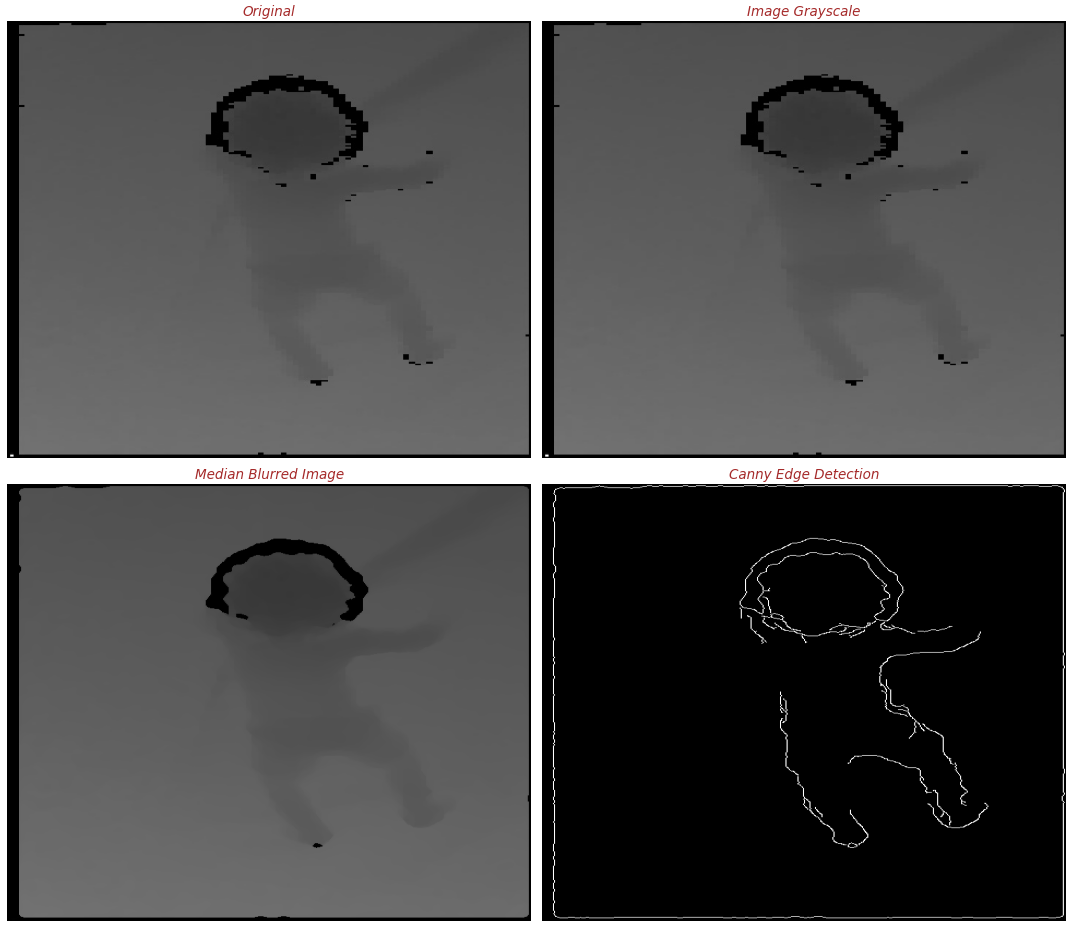

In [95]:
# Canny edge detection
min_val = 5
max_val = 18
canny_edges4 = canny_edge_detection(img_dn4, min_val, max_val, True)

# Grayscale image
img_gray4 = cv2.imread(hp_engg_df['Img_name'].iloc[img_idx])

# All techniques at one place
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,13), sharex=True, sharey=True)
    # Original image
    ax[0,0].imshow(img4, aspect='auto')
    ax[0,0].set_title("Original", fontdict= label_font_dict)
    ax[0,0].axis("off")
    
    # Grayscale image
    ax[0,1].imshow(img_gray4, aspect='auto')
    ax[0,1].set_title("Image Grayscale", fontdict= label_font_dict)
    ax[0,1].axis("off")
    
    # Median Blur image
    ax[1,0].imshow(img_dn4, aspect='auto')
    ax[1,0].set_title("Median Blurred Image", fontdict= label_font_dict)
    ax[1,0].axis("off")
    
    # Canny edge detection
    ax[1,1].imshow(canny_edges4, aspect='auto', cmap="gray")
    ax[1,1].set_title("Canny Edge Detection", fontdict= label_font_dict)
    ax[1,1].axis("off")   
    plt.tight_layout()

**`OBSERVATION`**

- After seeing the above results we can say that the Canny detection performed on the Median Blurred image has worked quite well in capturing the edges very prominently.

# **`SUMMARY`**

- By using the boundingbox coordinates we come up with the 34 new features that are the distances of a specific body part coordinates from the TOP and BOTTOM of the overall bbox coordinates.

- In the EDA, we found that in some of the images the boundary pixels of the focussed object has dark or black pixels. There can be possible reasons of the same.(shown above in the EDA - II section)

- We also found that the basic edge detection techniques were unable to capture the edges of the focussed object.

- Whereas, the Canny Edge Detector on the Median Blurred images provided us the well captured edges of the focussed object.